In [1]:
import warnings
warnings.filterwarnings('ignore')
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pdb
from functions import mass_streamfunction
from scipy import stats as st

In [2]:
ctl_300 = xr.open_mfdataset('/scratch/mh920/data_isca/ECS_peaks_300ppm_SWfb/run*/atmos_monthly.nc')
weights = np.cos(np.deg2rad(ctl_300.lat))
weights.name = "weights"
ctl_600 = xr.open_mfdataset('/scratch/mh920/data_isca/ECS_peaks_600ppm_SWfb/run*/atmos_monthly.nc')
ctl_1200 = xr.open_mfdataset('/scratch/mh920/data_isca/ECS_peaks_1200ppm_SWfb/run*/atmos_monthly.nc')
ctl_2400 = xr.open_mfdataset('/scratch/mh920/data_isca/ECS_peaks_2400ppm_SWfb/run*/atmos_monthly.nc')
ctl_4800 = xr.open_mfdataset('/scratch/mh920/data_isca/ECS_peaks_4800ppm_SWfb/run*/atmos_monthly.nc')
ctl_9600 = xr.open_mfdataset('/scratch/mh920/data_isca/ECS_peaks_9600ppm_SWfb/run*/atmos_monthly.nc')
ctl_19200 = xr.open_mfdataset('/scratch/mh920/data_isca/ECS_peaks_19200ppm_SWfb/run*/atmos_monthly.nc')
ctl_38400 = xr.open_mfdataset('/scratch/mh920/data_isca/ECS_peaks_38400ppm_SWfb/run*/atmos_monthly.nc')
ctl_76800 = xr.open_mfdataset('/scratch/mh920/data_isca/ECS_peaks_76800ppm_SWfb/run*/atmos_monthly.nc')
ctl_115200 = xr.open_mfdataset('/scratch/mh920/data_isca/ECS_peaks_115200ppm_SWfb/run*/atmos_monthly.nc')

In [3]:
ctl_ = [ctl_300, ctl_600, ctl_1200, ctl_2400, ctl_4800, ctl_9600, ctl_19200, ctl_38400, ctl_76800, ctl_115200]
label_ = ['300ppm','600ppm','1200ppm','2400ppm','4800ppm','9600ppm','19200ppm','38400ppm','76800ppm','115200ppm']
ctl2_ = [ctl_300, ctl_600, ctl_1200, ctl_2400, ctl_4800, ctl_9600, ctl_19200, ctl_38400, ctl_76800]
inc_ = [ctl_600, ctl_1200, ctl_2400, ctl_4800, ctl_9600, ctl_19200, ctl_38400, ctl_76800, ctl_115200]
label2_ = ['600ppm-300ppm','1200ppm-600ppm','2400ppm-1200ppm','4800ppm-2400ppm','9600ppm-4800ppm','19200ppm-9600ppm','38400ppm-19200ppm','76800ppm-38400ppm','115200ppm-76800ppm']
colors = plt.cm.coolwarm(np.linspace(0,1,10))
colors2 = plt.cm.coolwarm(np.linspace(0,1,9))

In [28]:
for i in range(len(ctl_)):
    (ctl_[i].t_surf+1).isel(time=slice(50,100)).mean('time').to_netcdf('./surfT/t_surf_'+label_[i]+'.nc')

In [29]:
for num in [300,600,1200,2400,4800,9600,19200,38400,76800,115200]:
    T = xr.open_dataset('./surfT/t_surf_'+str(num)+'ppm.nc')
    T = T.rename({'t_surf' : 't_surf_'+str(num)+'ppm_'}).assign_coords({"lonb" : ctl_300.lonb, "latb" : ctl_300.latb})
    T.to_netcdf('./surfT/t_surf_'+str(num)+'ppm_.nc')

In [30]:
W = xr.open_dataset('./surfT/t_surf_300ppm_.nc')
W

<xarray.Dataset>
Dimensions:         (lat: 64, latb: 65, lon: 128, lonb: 129)
Coordinates:
  * lon             (lon) float64 0.0 2.812 5.625 8.438 ... 351.6 354.4 357.2
  * lat             (lat) float64 -87.86 -85.1 -82.31 ... 82.31 85.1 87.86
  * lonb            (lonb) float64 -1.406 1.406 4.219 ... 353.0 355.8 358.6
  * latb            (latb) float64 -90.0 -86.58 -83.76 ... 83.76 86.58 90.0
Data variables:
    t_surf_300ppm_  (lat, lon) float32 ...

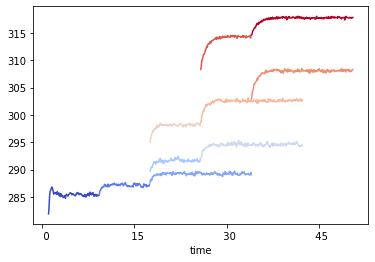

In [4]:
n = 10
colors = plt.cm.coolwarm(np.linspace(0,1,n))
ctl_300.t_surf.weighted(weights).mean(('lat','lon')).plot(label='300ppm',c=colors[0])
ctl_600.t_surf.weighted(weights).mean(('lat','lon')).plot(label='600ppm',c=colors[1])
ctl_1200.t_surf.weighted(weights).mean(('lat','lon')).plot(label='1200ppm',c=colors[2])
ctl_2400.t_surf.weighted(weights).mean(('lat','lon')).plot(label='2400ppm',c=colors[3])
ctl_4800.t_surf.weighted(weights).mean(('lat','lon')).plot(label='4800ppm',c=colors[4])
ctl_9600.t_surf.weighted(weights).mean(('lat','lon')).plot(label='9600ppm',c=colors[5])
ctl_19200.t_surf.weighted(weights).mean(('lat','lon')).plot(label='19200ppm',c=colors[6])
ctl_38400.t_surf.weighted(weights).mean(('lat','lon')).plot(label='38400ppm',c=colors[7])
ctl_76800.t_surf.weighted(weights).mean(('lat','lon')).plot(label='76800ppm',c=colors[8])
ctl_115200.t_surf.weighted(weights).mean(('lat','lon')).plot(label='115200ppm',c=colors[9])

In [8]:
Ts = [ctl_300.t_surf.isel(time=slice(50,100)).weighted(weights).mean(('lat','lon','time')),
      ctl_600.t_surf.isel(time=slice(50,100)).weighted(weights).mean(('lat','lon','time')),
      ctl_1200.t_surf.isel(time=slice(50,100)).weighted(weights).mean(('lat','lon','time')),
      ctl_2400.t_surf.isel(time=slice(50,100)).weighted(weights).mean(('lat','lon','time')),
      ctl_4800.t_surf.isel(time=slice(50,100)).weighted(weights).mean(('lat','lon','time')),
      ctl_9600.t_surf.isel(time=slice(50,100)).weighted(weights).mean(('lat','lon','time')),
      ctl_19200.t_surf.isel(time=slice(50,100)).weighted(weights).mean(('lat','lon','time')),
      ctl_38400.t_surf.isel(time=slice(50,100)).weighted(weights).mean(('lat','lon','time')),
      ctl_76800.t_surf.isel(time=slice(50,100)).weighted(weights).mean(('lat','lon','time')),
      ctl_115200.t_surf.isel(time=slice(50,100)).weighted(weights).mean(('lat','lon','time'))]
dTs = np.diff(Ts)
dTs[8] = dTs[8]/np.log2(1.5)

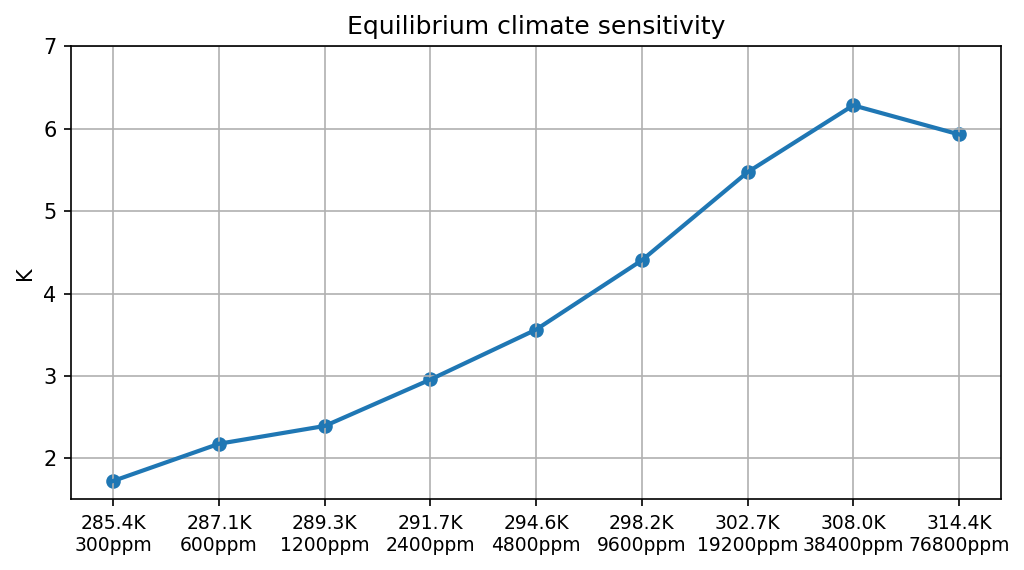

In [6]:
ticklabels=['285.4K','\n300ppm',
            '287.1K','\n600ppm',
            '289.3K','\n1200ppm',
            '291.7K','\n2400ppm',
            '294.6K','\n4800ppm',
            '298.2K','\n9600ppm',
            '302.7K','\n19200ppm',
            '308.0K','\n38400ppm',
            '314.4K','\n76800ppm']
new_labels = [ ''.join(x) for x in zip(ticklabels[0::2], ticklabels[1::2])]

plt.figure(figsize=(8, 4),dpi=150)
plt.scatter([0,1,2,3,4,5,6,7,8],dTs)
plt.plot([0,1,2,3,4,5,6,7,8], dTs ,lw=2)
plt.grid()
plt.xticks([0,1,2,3,4,5,6,7,8],new_labels,fontsize=9,rotation=0)
plt.ylabel('K')
plt.ylim([1.5,7])
plt.title('Equilibrium climate sensitivity')
plt.savefig('./figs/ECS.pdf')
plt.show()

In [5]:
forc = np.zeros(len(inc_))
fb = np.zeros(len(inc_))
r2 = np.zeros(len(inc_))
for i in range(len(inc_)):
    x = inc_[i].t_surf.isel(time=slice(0,50)).weighted(weights).mean(('lat','lon')).values-ctl_[i].t_surf.isel(time=slice(50,100)).weighted(weights).mean(('time','lat','lon')).values
    y = -(inc_[i].soc_olr-inc_[i].soc_toa_sw).isel(time=slice(0,50)).weighted(weights).mean(('lat','lon')).values
    pf = st.linregress(x, y)
    forc[i] = pf[1]
    fb[i] = pf[0]
    r2[i] = pf[2]
    
forc[8] = forc[8]/np.log2(1.5)

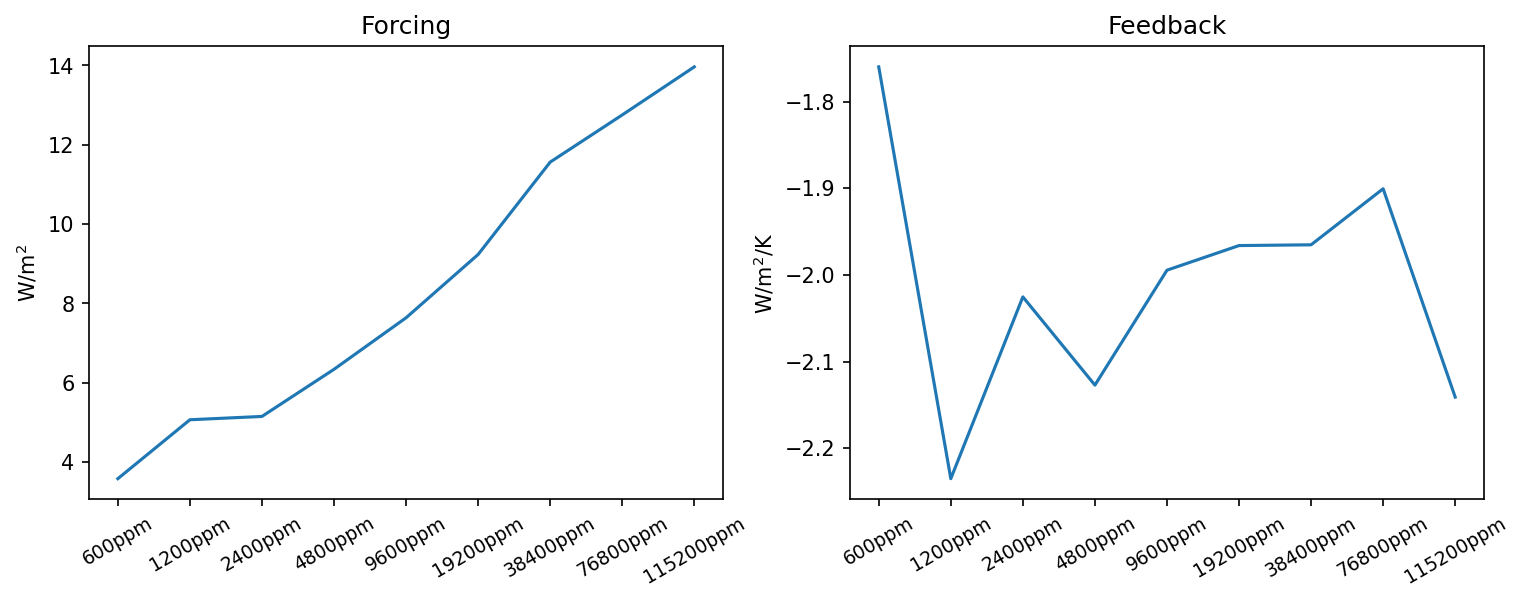

In [6]:
plt.figure(figsize=(12, 4),dpi=150)
plt.subplot(121)
plt.title('Forcing')
plt.ylabel('W/m$^2$')
plt.xticks(np.arange(10),['600ppm','1200ppm','2400ppm','4800ppm','9600ppm','19200ppm','38400ppm','76800ppm','115200ppm','153600ppm'],fontsize=9,rotation=30)
plt.plot(forc)
plt.subplot(122)
plt.title('Feedback')
plt.ylabel('W/m$^2$/K')
plt.xticks(np.arange(10),['600ppm','1200ppm','2400ppm','4800ppm','9600ppm','19200ppm','38400ppm','76800ppm','115200ppm','153600ppm'],fontsize=9,rotation=30)
plt.plot(fb)
plt.show()

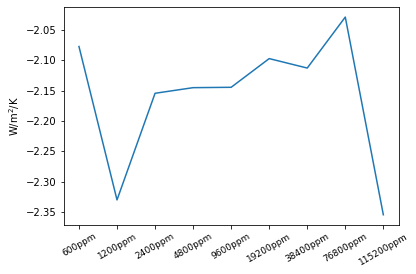

In [10]:
fb_ECS = forc/dTs
plt.ylabel('W/m$^2$/K')
plt.xticks(np.arange(10),['600ppm','1200ppm','2400ppm','4800ppm','9600ppm','19200ppm','38400ppm','76800ppm','115200ppm','153600ppm'],fontsize=9,rotation=30)
plt.plot(-fb_ECS)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

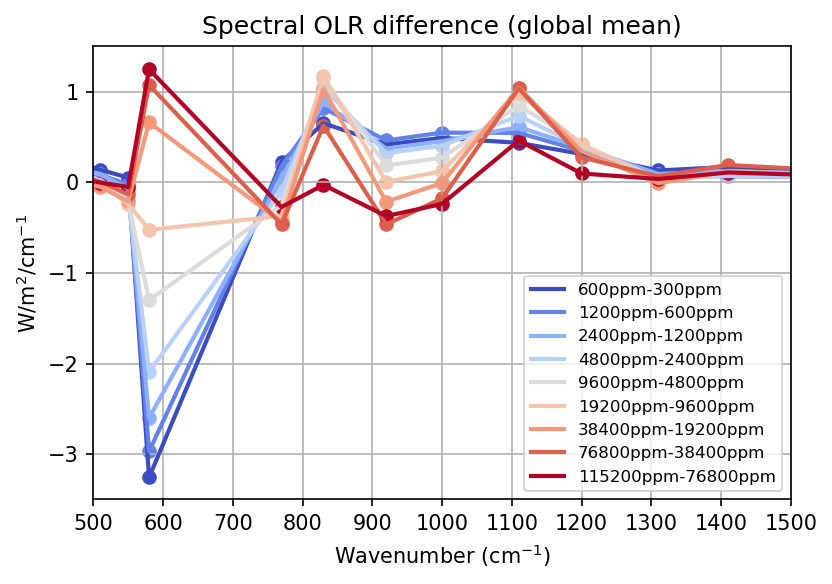

In [7]:
colors = plt.cm.coolwarm(np.linspace(0,1,9))

lat_min=-90
lat_max=90
plt.figure(figsize=(6, 4),dpi=150)
x=1/ctl_300.soc_bins_lw.values/100
i=0
for (ctl,inc,ilabel) in zip(ctl2_,inc_,label2_):
    plt.scatter(x, (inc.soc_spectral_olr.isel(time=slice(50,100)).sel(lat=slice(lat_min,lat_max)).weighted(weights).mean(('time','lat','lon'))
                -ctl.soc_spectral_olr.isel(time=slice(50,100)).sel(lat=slice(lat_min,lat_max)).weighted(weights).mean(('time','lat','lon'))).values,c=colors[i])
    plt.plot(x, (inc.soc_spectral_olr.isel(time=slice(50,100)).sel(lat=slice(lat_min,lat_max)).weighted(weights).mean(('time','lat','lon'))
             -ctl.soc_spectral_olr.isel(time=slice(50,100)).sel(lat=slice(lat_min,lat_max)).weighted(weights).mean(('time','lat','lon'))).values ,c=colors[i],lw=2,label=ilabel)

    i+=1
plt.title('Spectral OLR difference (global mean)')
plt.xlabel('Wavenumber (cm$^{-1}$)')
plt.ylabel('W/m$^2$/cm$^{-1}$')
plt.ylim([-3.5,1.5])
plt.legend(fontsize=8)
plt.xlim([500,1500])
plt.xticks(np.linspace(500,1500,11))
plt.grid()
plt.savefig('./figs/spectral.pdf')
plt.show()

In [9]:
def linear_trend(x, y):
    pf = st.linregress(x, y)
    return xr.DataArray(pf[0])
def linear_trend2(x, y):
    pf = st.linregress(x, y)
    return xr.DataArray(pf[2]**2)

def lwcsfb(obj):
    slopes = xr.apply_ufunc(linear_trend,
                            obj.t_surf.isel(time=slice(20,100)).load(), obj.soc_olr.isel(time=slice(20,100)).load(),
                            vectorize=True,
                            input_core_dims=[['time'], ['time']],
                            )
    return slopes

def lwcsfb_err(obj):
    slopes2 = xr.apply_ufunc(linear_trend2,
                            obj.t_surf.isel(time=slice(20,100)).load(), obj.soc_olr.isel(time=slice(20,100)).load(),
                            vectorize=True,
                            input_core_dims=[['time'], ['time']],
                            )
    return slopes2

def drhdts(obj):
    slopes = xr.apply_ufunc(linear_trend,
                            obj.t_surf.isel(time=slice(20,100)).load(), obj.rh.sel(pfull=slice(200,850)).mean('pfull').isel(time=slice(20,100)).load(),
                            vectorize=True,
                            input_core_dims=[['time'], ['time']],
                            )
    return slopes

def drhdts_err(obj):
    slopes2 = xr.apply_ufunc(linear_trend2,
                            obj.t_surf.isel(time=slice(20,100)).load(), obj.rh.sel(pfull=slice(200,850)).mean('pfull').isel(time=slice(20,100)).load(),
                            vectorize=True,
                            input_core_dims=[['time'], ['time']],
                            )
    return slopes2

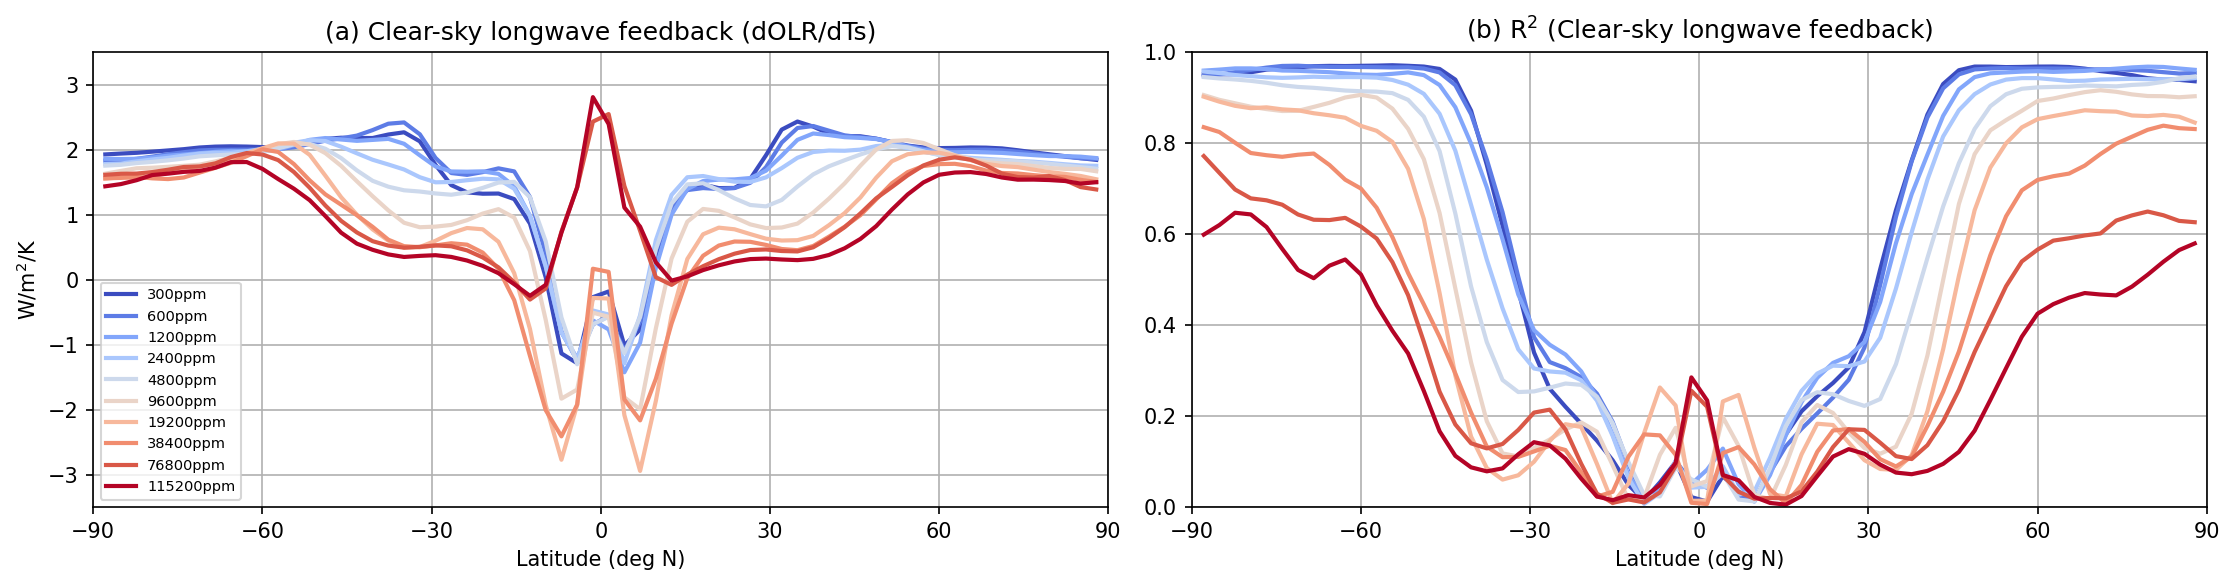

In [11]:
colors = plt.cm.coolwarm(np.linspace(0,1,10))
plt.figure(figsize=(15, 4),dpi=150)
plt.subplot(121)
i=0
for (ctl,ilabel) in zip(ctl_,label_):
    lwcsfb(ctl).mean('lon').plot(color=colors[i],lw=2,label=ilabel)
    i+=1
plt.title('(a) Clear-sky longwave feedback (dOLR/dTs)')
plt.xlabel('Latitude (deg N)')
plt.xticks(np.linspace(-90,90,7))
plt.xlim([-90,90])
plt.ylim([-3.5,3.5])
plt.ylabel('W/m$^2$/K')
plt.legend(fontsize=7)
plt.grid()

plt.subplot(122)
i=0
for (ctl,ilabel) in zip(ctl_,label_):
    lwcsfb_err(ctl).mean('lon').plot(color=colors[i],lw=2,label=ilabel)
    i+=1
plt.title('(b) R$^2$ (Clear-sky longwave feedback)')
plt.xlabel('Latitude (deg N)')
plt.xticks(np.linspace(-90,90,7))
plt.xlim([-90,90])
plt.ylim([0,1])
# plt.ylabel('W/m$^2$/K')
plt.grid()
plt.tight_layout()
# plt.savefig('./figs/feedback_lat.pdf')
plt.show()

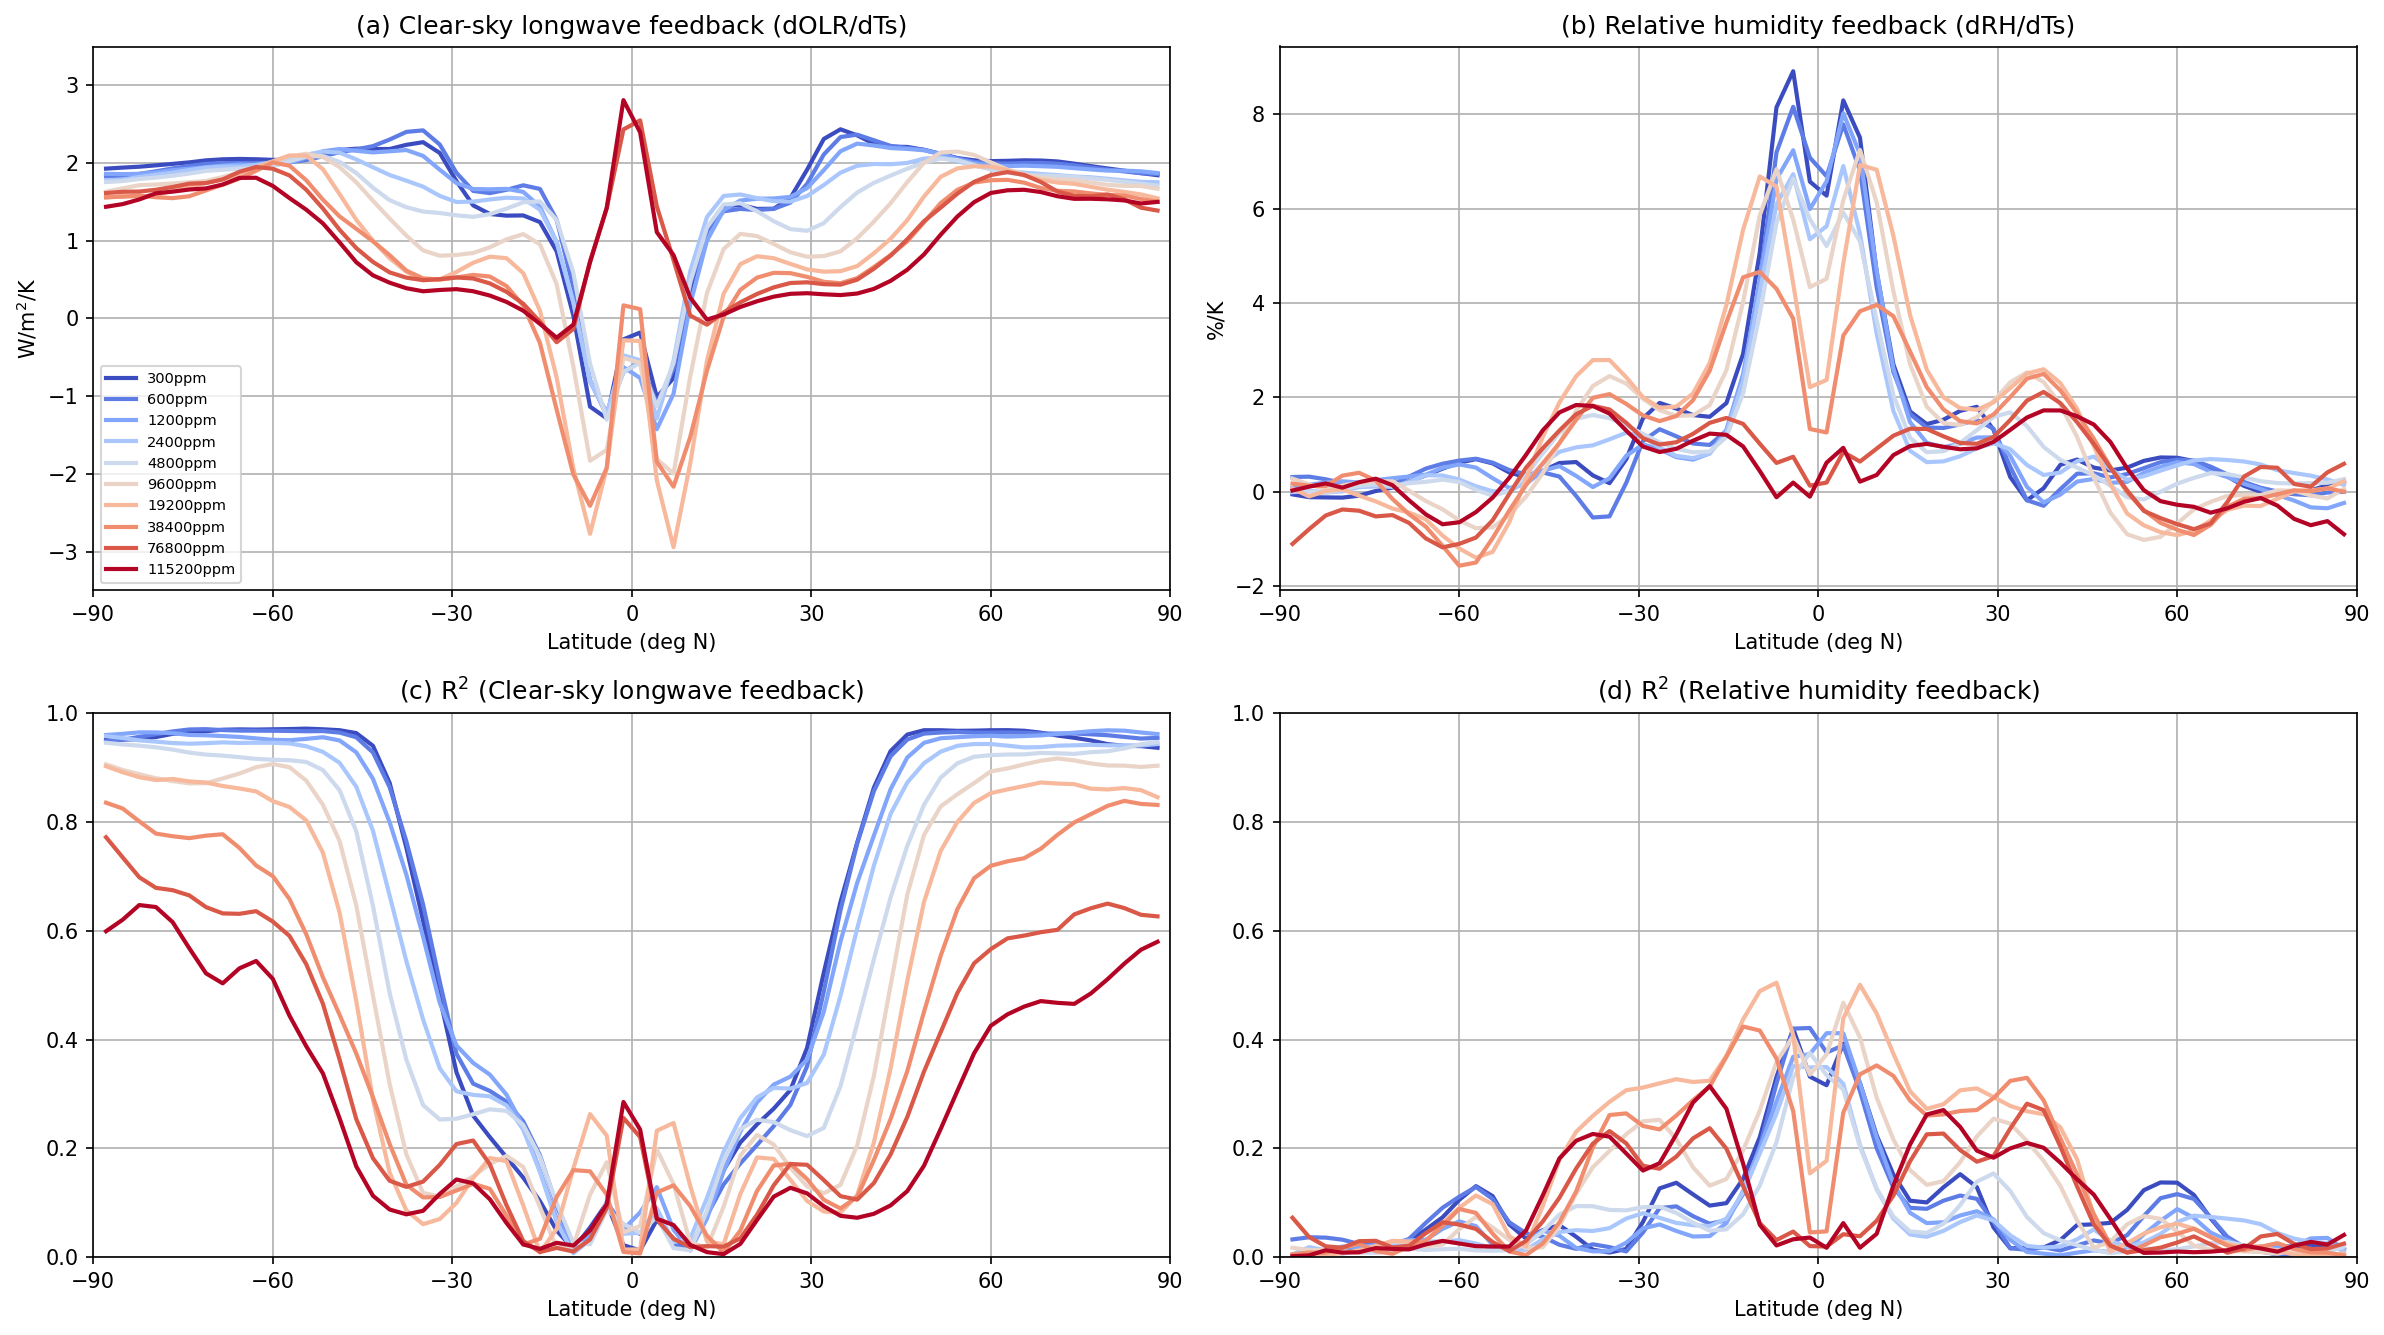

In [10]:
colors = plt.cm.coolwarm(np.linspace(0,1,10))
plt.figure(figsize=(16, 9),dpi=150)
plt.subplot(221)
i=0
for (ctl,ilabel) in zip(ctl_,label_):
    lwcsfb(ctl).mean('lon').plot(color=colors[i],lw=2,label=ilabel)
    i+=1
plt.title('(a) Clear-sky longwave feedback (dOLR/dTs)')
plt.xlabel('Latitude (deg N)')
plt.xticks(np.linspace(-90,90,7))
plt.xlim([-90,90])
plt.ylim([-3.5,3.5])
plt.ylabel('W/m$^2$/K')
plt.legend(fontsize=7)
plt.grid()

plt.subplot(222)
i=0
for (ctl,ilabel) in zip(ctl_,label_):
    drhdts(ctl).mean('lon').plot(color=colors[i],lw=2,label=ilabel)
    i+=1
plt.title('(b) Relative humidity feedback (dRH/dTs)')
plt.xlabel('Latitude (deg N)')
plt.xticks(np.linspace(-90,90,7))
plt.xlim([-90,90])
plt.ylabel('%/K')
plt.grid()

plt.subplot(223)
i=0
for (ctl,ilabel) in zip(ctl_,label_):
    lwcsfb_err(ctl).mean('lon').plot(color=colors[i],lw=2,label=ilabel)
    i+=1
plt.title('(c) R$^2$ (Clear-sky longwave feedback)')
plt.xlabel('Latitude (deg N)')
plt.xticks(np.linspace(-90,90,7))
plt.xlim([-90,90])
plt.ylim([0,1])
# plt.ylabel('W/m$^2$/K')
plt.grid()

plt.subplot(224)
i=0
for (ctl,ilabel) in zip(ctl_,label_):
    drhdts_err(ctl).mean('lon').plot(color=colors[i],lw=2,label=ilabel)
    i+=1
plt.title('(d) R$^2$ (Relative humidity feedback)')
plt.xlabel('Latitude (deg N)')
plt.xticks(np.linspace(-90,90,7))
plt.xlim([-90,90])
plt.ylim([0,1])
plt.grid()
plt.tight_layout()
# plt.savefig('./figs/feedback_lat.pdf')
plt.show()

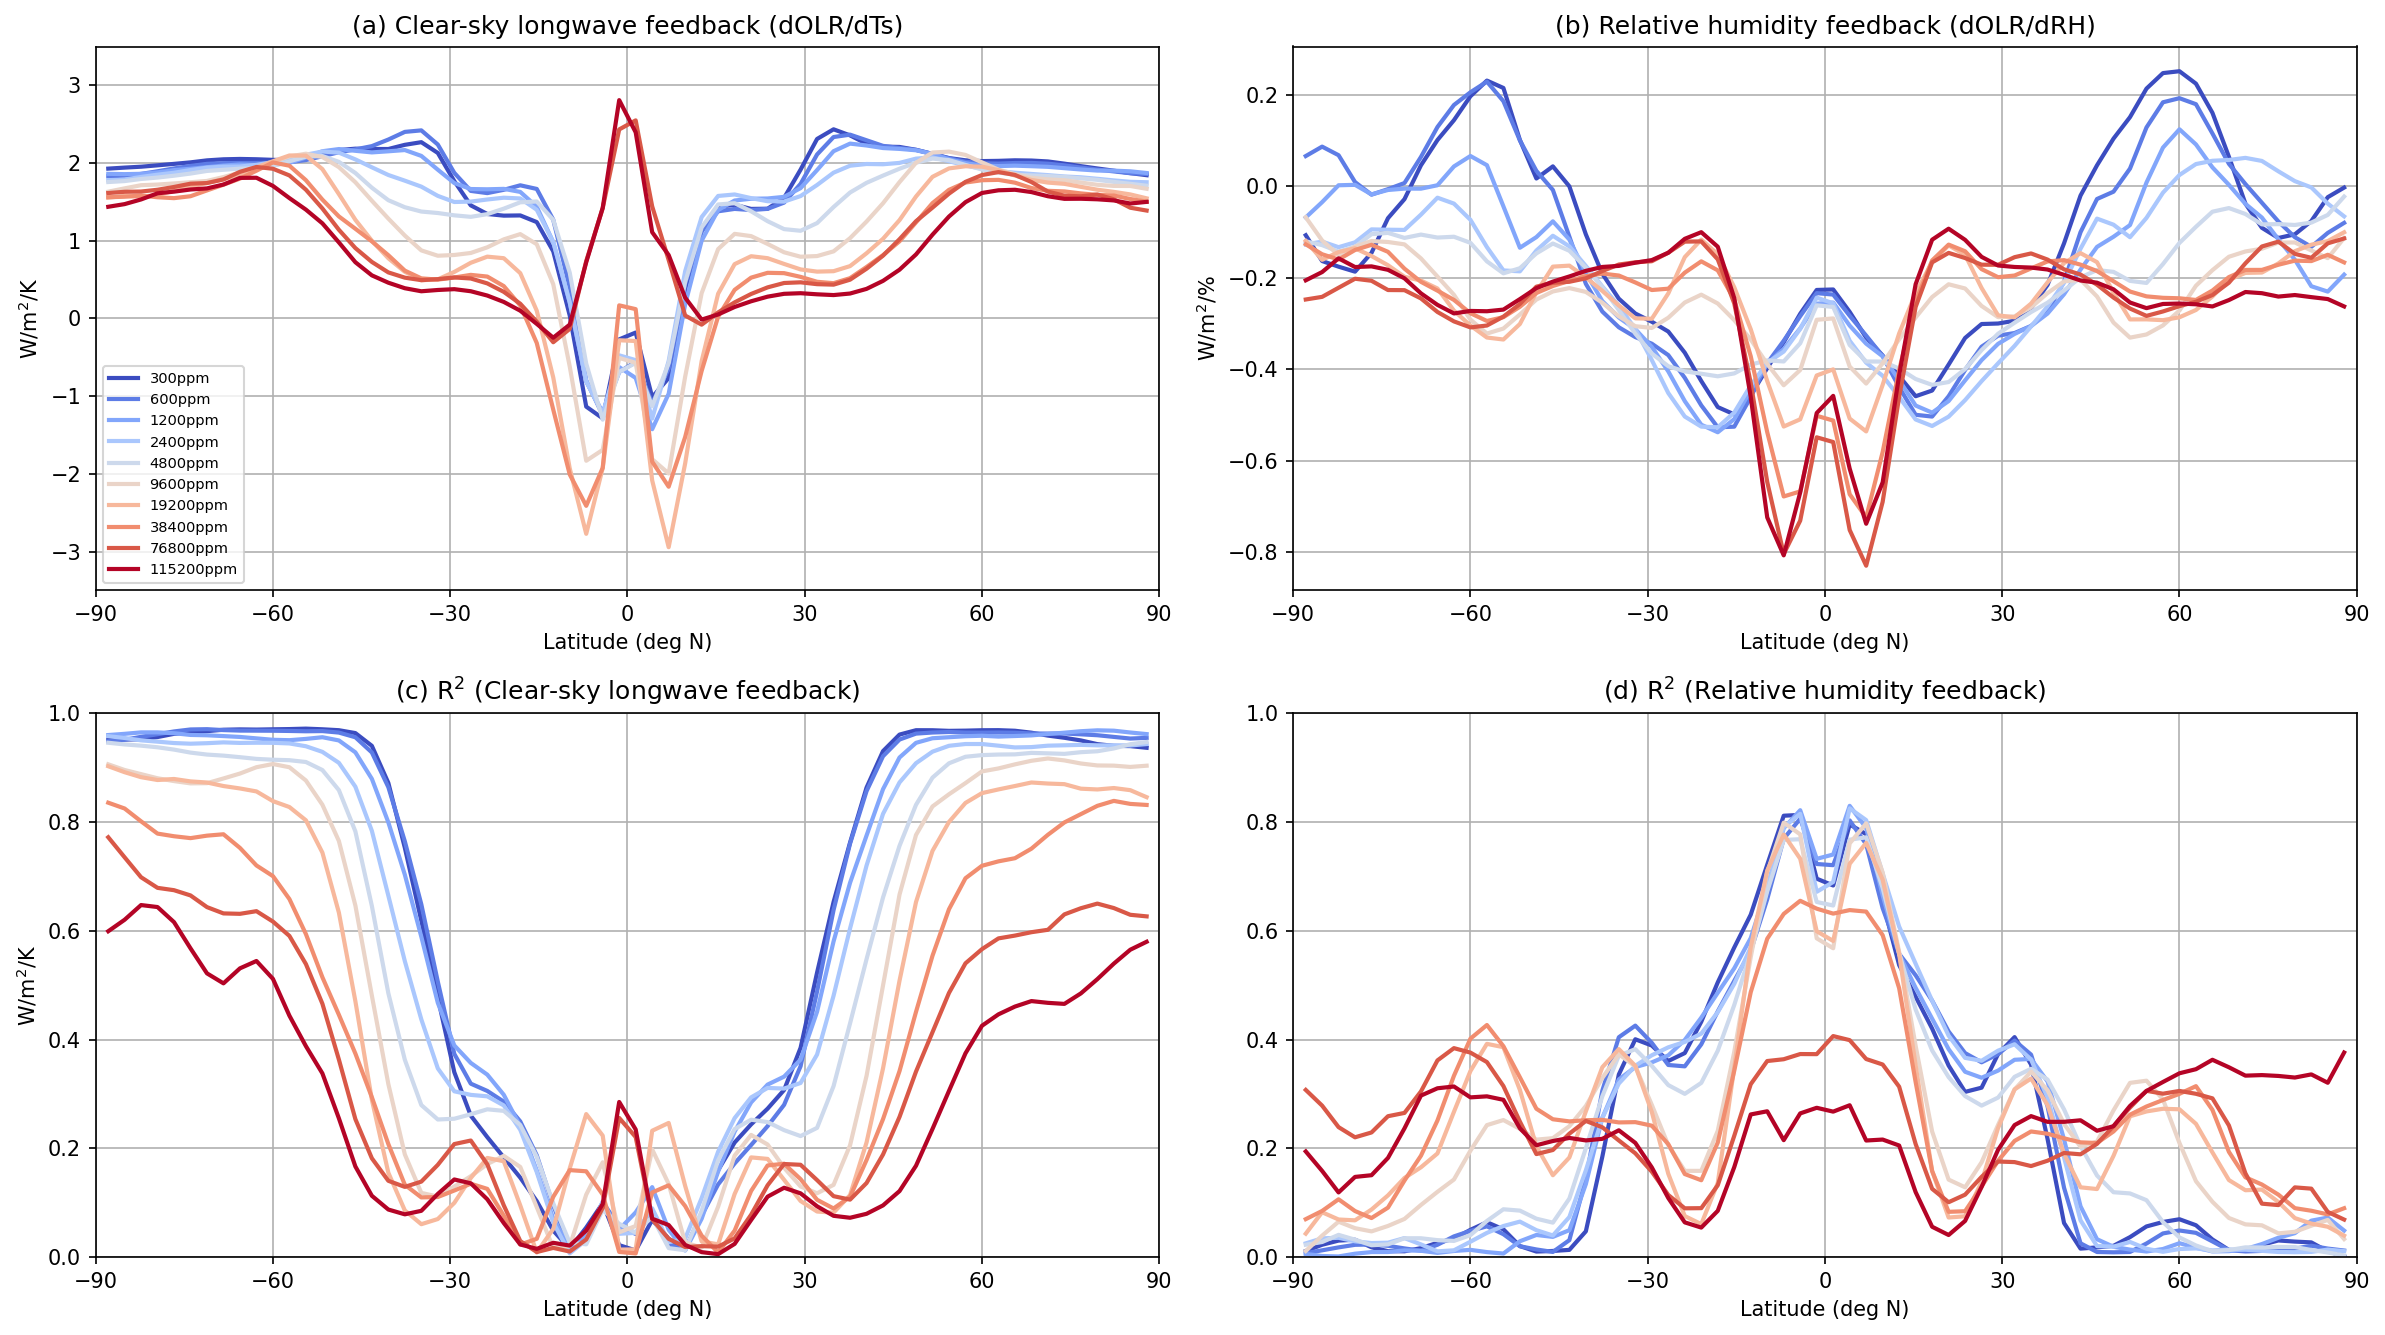

In [7]:
colors = plt.cm.coolwarm(np.linspace(0,1,10))
plt.figure(figsize=(16, 9),dpi=150)
plt.subplot(221)
i=0
for (ctl,ilabel) in zip(ctl_,label_):
    lwcsfb(ctl).mean('lon').plot(color=colors[i],lw=2,label=ilabel)
    i+=1
plt.title('(a) Clear-sky longwave feedback (dOLR/dTs)')
plt.xlabel('Latitude (deg N)')
plt.xticks(np.linspace(-90,90,7))
plt.xlim([-90,90])
plt.ylim([-3.5,3.5])
plt.ylabel('W/m$^2$/K')
plt.legend(fontsize=7)
plt.grid()

plt.subplot(222)
i=0
for (ctl,ilabel) in zip(ctl_,label_):
    drhdts(ctl).mean('lon').plot(color=colors[i],lw=2,label=ilabel)
    i+=1
plt.title('(b) Relative humidity feedback (dOLR/dRH)')
plt.xlabel('Latitude (deg N)')
plt.xticks(np.linspace(-90,90,7))
plt.xlim([-90,90])
plt.ylabel('W/m$^2$/%')
plt.grid()

plt.subplot(223)
i=0
for (ctl,ilabel) in zip(ctl_,label_):
    lwcsfb_err(ctl).mean('lon').plot(color=colors[i],lw=2,label=ilabel)
    i+=1
plt.title('(c) R$^2$ (Clear-sky longwave feedback)')
plt.xlabel('Latitude (deg N)')
plt.xticks(np.linspace(-90,90,7))
plt.xlim([-90,90])
plt.ylim([0,1])
# plt.ylabel('W/m$^2$/K')
plt.grid()

plt.subplot(224)
i=0
for (ctl,ilabel) in zip(ctl_,label_):
    drhdts_err(ctl).mean('lon').plot(color=colors[i],lw=2,label=ilabel)
    i+=1
plt.title('(d) R$^2$ (Relative humidity feedback)')
plt.xlabel('Latitude (deg N)')
plt.xticks(np.linspace(-90,90,7))
plt.xlim([-90,90])
plt.ylim([0,1])
plt.grid()
plt.tight_layout()
# plt.savefig('./figs/feedback_lat.pdf')
plt.show()

Hard to make sense of Ts vs OLR when taking global average, but works for single point.

Text(0.5, 1.0, 'OLR vs T$_S$ (lat=60)')

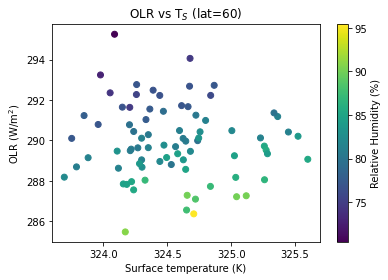

In [10]:
latj=0
plt.scatter(ctl_38400.t_surf.isel(time=slice(20,100)).sel(lat=latj,lon=0,method='nearest'), ctl_38400.soc_olr.isel(time=slice(20,100)).sel(lat=latj,lon=0,method='nearest'),
            c=ctl_38400.rh.sel(pfull=slice(5,850)).mean('pfull').isel(time=slice(20,100)).sel(lat=latj,lon=0,method='nearest'))
plt.colorbar(label='Relative Humidity (%)')
plt.xlabel('Surface temperature (K)')
plt.ylabel('OLR (W/m$^2$)')
plt.title('OLR vs T$_S$ (lat=60)')

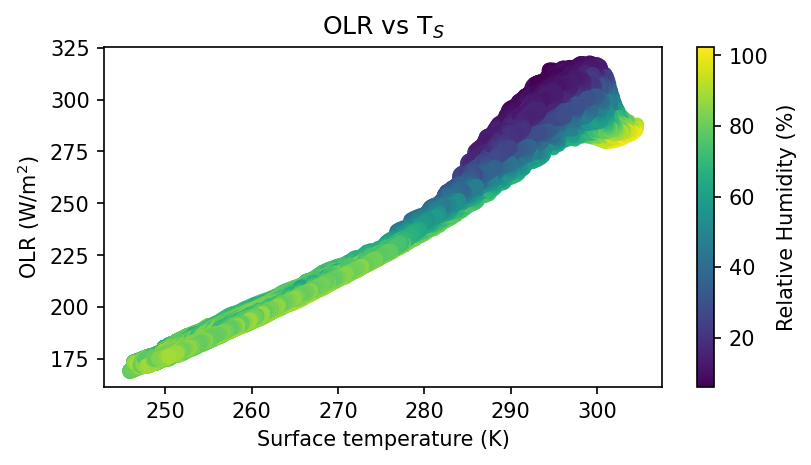

In [11]:
plt.figure(figsize=(6, 3),dpi=150)
plt.scatter(ctl_300.t_surf.isel(time=slice(20,100)), ctl_300.soc_olr.isel(time=slice(20,100)),
            c=ctl_300.rh.sel(pfull=slice(150,850)).mean('pfull').isel(time=slice(20,100)))
plt.colorbar(label='Relative Humidity (%)')
plt.xlabel('Surface temperature (K)')
plt.ylabel('OLR (W/m$^2$)')
plt.title('OLR vs T$_S$')
plt.show()

In [5]:
def rh_slope(obj,lim):
    rh3d = obj.rh.sel(pfull=slice(150,850)).mean('pfull').isel(time=slice(20,100))
    slopes = xr.apply_ufunc(linear_trend,
                            obj.t_surf.isel(time=slice(20,100)).where(rh3d>lim).where(rh3d<=lim+10).load(), 
                            obj.soc_olr.isel(time=slice(20,100)).where(rh3d>lim).where(rh3d<=lim+10).load(),
                            vectorize=True,
                            input_core_dims=[['time'], ['time']],
                            )
    return slopes

def rh_slope_err(obj,lim):
    rh3d = obj.rh.sel(pfull=slice(150,850)).mean('pfull').isel(time=slice(20,100))
    slopes2 = xr.apply_ufunc(linear_trend2,
                            obj.t_surf.isel(time=slice(20,100)).where(rh3d>lim).where(rh3d<=lim+10).load(), 
                            obj.soc_olr.isel(time=slice(20,100)).where(rh3d>lim).where(rh3d<=lim+10).load(),
                            vectorize=True,
                            input_core_dims=[['time'], ['time']],
                            )
    return slopes2

In [67]:
# rh_arr = np.linspace(0,99,100)
# slope_arr = np.zeros((len(ctl_),len(rh_arr)))
# r2_arr = np.zeros((len(ctl_),len(rh_arr)))
# i=0
# for ctl in ctl_:
#     j=0
#     for lim in rh_arr:
#         rh3d = ctl.rh.sel(pfull=slice(150,850)).mean('pfull').isel(time=slice(20,100))
#         x = ctl.t_surf.isel(time=slice(20,100)).where(rh3d>lim).where(rh3d<=lim+1).values.ravel()
#         y = ctl.soc_olr.isel(time=slice(20,100)).where(rh3d>lim).where(rh3d<=lim+1).values.ravel()
#         mask = ~np.isnan(x) & ~np.isnan(y)
#         try:
#             pf = st.linregress(x[mask], y[mask])
#             slope_arr[i][j]=pf[0]
#             r2_arr[i][j]=pf[2]**2
#         except:
#             slope_arr[i][j]=np.nan
#             r2_arr[i][j]=np.nan
#         j+=1
#     i+=1

In [11]:
# np.save('rh_arr.npy',rh_arr)
# np.save('slope_arr.npy',slope_arr)
# np.save('r2_arr.npy',r2_arr)
rh_arr = np.load('rh_arr.npy')
slope_arr = np.load('slope_arr.npy')
r2_arr = np.load('r2_arr.npy')

In [79]:
ave_slope_arr = np.zeros(len(ctl_))
ave_r2_arr = np.zeros(len(ctl_))
i=0
for ctl in ctl_:
    x = ctl.t_surf.isel(time=slice(20,100)).values.ravel()
    y = ctl.soc_olr.isel(time=slice(20,100)).values.ravel()
    mask = ~np.isnan(x) & ~np.isnan(y)
    pf = st.linregress(x[mask], y[mask])
    ave_slope_arr[i]=pf[0]
    ave_r2_arr[i]=pf[2]**2
    i+=1

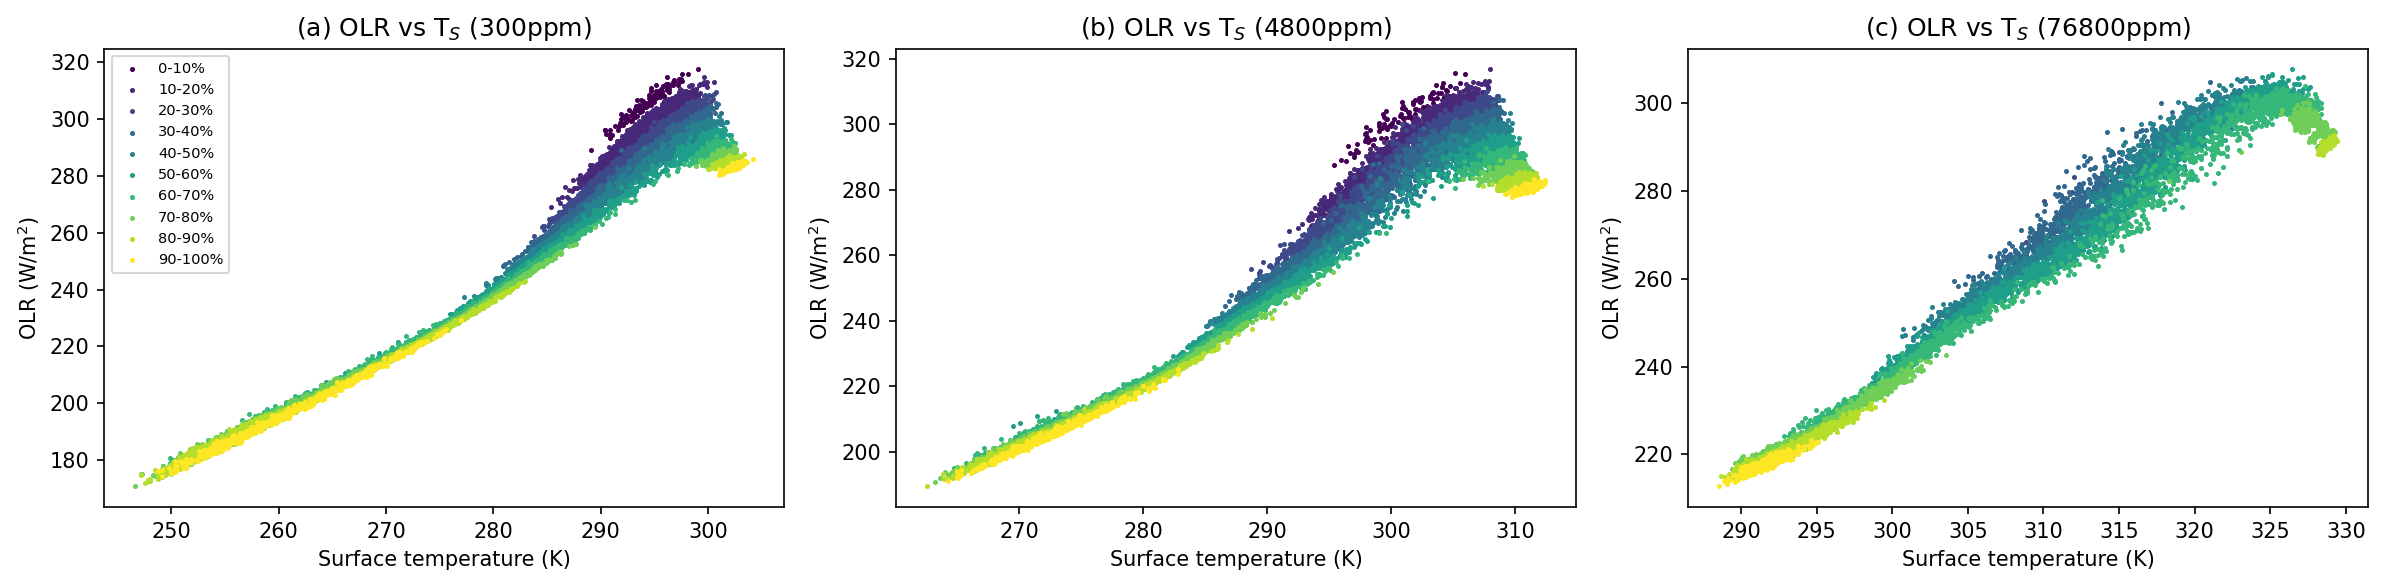

In [7]:
colors_rh = plt.cm.viridis(np.linspace(0,1,10))
colors = plt.cm.coolwarm(np.linspace(0,1,10))
rh_arr = np.linspace(0,90,10)

plt.figure(figsize=(16, 4),dpi=150)
plt.subplot(131)
rh3d = ctl_300.rh.sel(pfull=slice(150,850)).mean('pfull').isel(time=slice(20,100))
for (lim,col) in zip(rh_arr,colors_rh):
    plt.scatter(ctl_300.t_surf.isel(time=slice(20,100)).where(rh3d>lim).where(rh3d<=lim+10).mean('lon'), 
                ctl_300.soc_olr.isel(time=slice(20,100)).where(rh3d>lim).where(rh3d<=lim+10).mean('lon'),
                s=2,color=col,label=str(int(lim))+'-'+str(int(lim)+10)+'%')
plt.legend(fontsize=7)
plt.xlabel('Surface temperature (K)')
plt.ylabel('OLR (W/m$^2$)')
plt.title('(a) OLR vs T$_S$ (300ppm)')

plt.subplot(132)
rh3d = ctl_4800.rh.sel(pfull=slice(150,850)).mean('pfull').isel(time=slice(20,100))
for (lim,col) in zip(rh_arr,colors_rh):
    plt.scatter(ctl_4800.t_surf.isel(time=slice(20,100)).where(rh3d>lim).where(rh3d<=lim+10).mean('lon'), 
                ctl_4800.soc_olr.isel(time=slice(20,100)).where(rh3d>lim).where(rh3d<=lim+10).mean('lon'),
                s=2,color=col,label=str(int(lim))+'-'+str(int(lim)+10)+'%')
# plt.legend(fontsize=7)
plt.xlabel('Surface temperature (K)')
plt.ylabel('OLR (W/m$^2$)')
plt.title('(b) OLR vs T$_S$ (4800ppm)')

plt.subplot(133)
rh3d = ctl_76800.rh.sel(pfull=slice(150,850)).mean('pfull').isel(time=slice(20,100))
for (lim,col) in zip(rh_arr,colors_rh):
    plt.scatter(ctl_76800.t_surf.isel(time=slice(20,100)).where(rh3d>lim).where(rh3d<=lim+10).mean('lon'), 
                ctl_76800.soc_olr.isel(time=slice(20,100)).where(rh3d>lim).where(rh3d<=lim+10).mean('lon'),
                s=2,color=col,label=str(int(lim))+'-'+str(int(lim)+10)+'%')
# plt.legend(fontsize=7)
plt.xlabel('Surface temperature (K)')
plt.ylabel('OLR (W/m$^2$)')
plt.title('(c) OLR vs T$_S$ (76800ppm)')
plt.tight_layout()
plt.savefig('./figs/rh_fig1.pdf')
plt.show()

In [13]:
[n,binsa,patches]=plt.hist(ctl_300.rh.where(ctl_300.pfull>200).where(ctl_300.pfull<850).values.flatten(),
         bins=100,histtype='step',color=colors[0],lw=2,label=label_[0],density=True)
plt.close()
i=0
rh_dist = np.zeros((10,len(n)))
for ctl in ctl_:
    [rh_dist[i],bins,patches]=plt.hist(ctl.rh.where(ctl.pfull>200).where(ctl.pfull<850).values.flatten(),
         bins=100,histtype='step',color=colors[i],lw=2,label=label_[i],density=True)
    i+=1
plt.close()

# masked_data = np.ma.masked_array(slope_arr, np.isnan(slope_arr))
# average = np.ma.average(masked_data, axis=1, weights=rh_dist)
# result = average.filled(np.nan)
# #If the above works, then fixed RH feedback: 
# masked_data = np.ma.masked_array(slope_arr, np.isnan(slope_arr))
# average = np.ma.average(masked_data, axis=1, weights=rh_dist[5])
# result_fixedrh = average.filled(np.nan)
# # and fixed slopes feedback:
# result_fixedslopes = np.zeros(10)
# masked_data = np.ma.masked_array(slope_arr[5], np.isnan(slope_arr[5]))
# for i in range(len(ctl_)):
#     result_fixedslopes[i] = np.ma.average(masked_data, weights=rh_dist[i])

# plt.subplot(224)
# plt.plot(result,lw=2,c='k',label='Total')
# plt.plot(result_fixedrh,lw=2,c='r',label='fixed RH')
# plt.plot(result_fixedslopes,lw=2,c='b',label='fixed slopes')
# plt.legend()
# plt.title('(d) Feedback decomposition')
# plt.ylabel('W/m$^2$/K')
# plt.xticks(np.arange(10),['300ppm','600ppm','1200ppm','2400ppm','4800ppm','9600ppm','19200ppm','38400ppm','76800ppm','115200ppm'],fontsize=9,rotation=30)


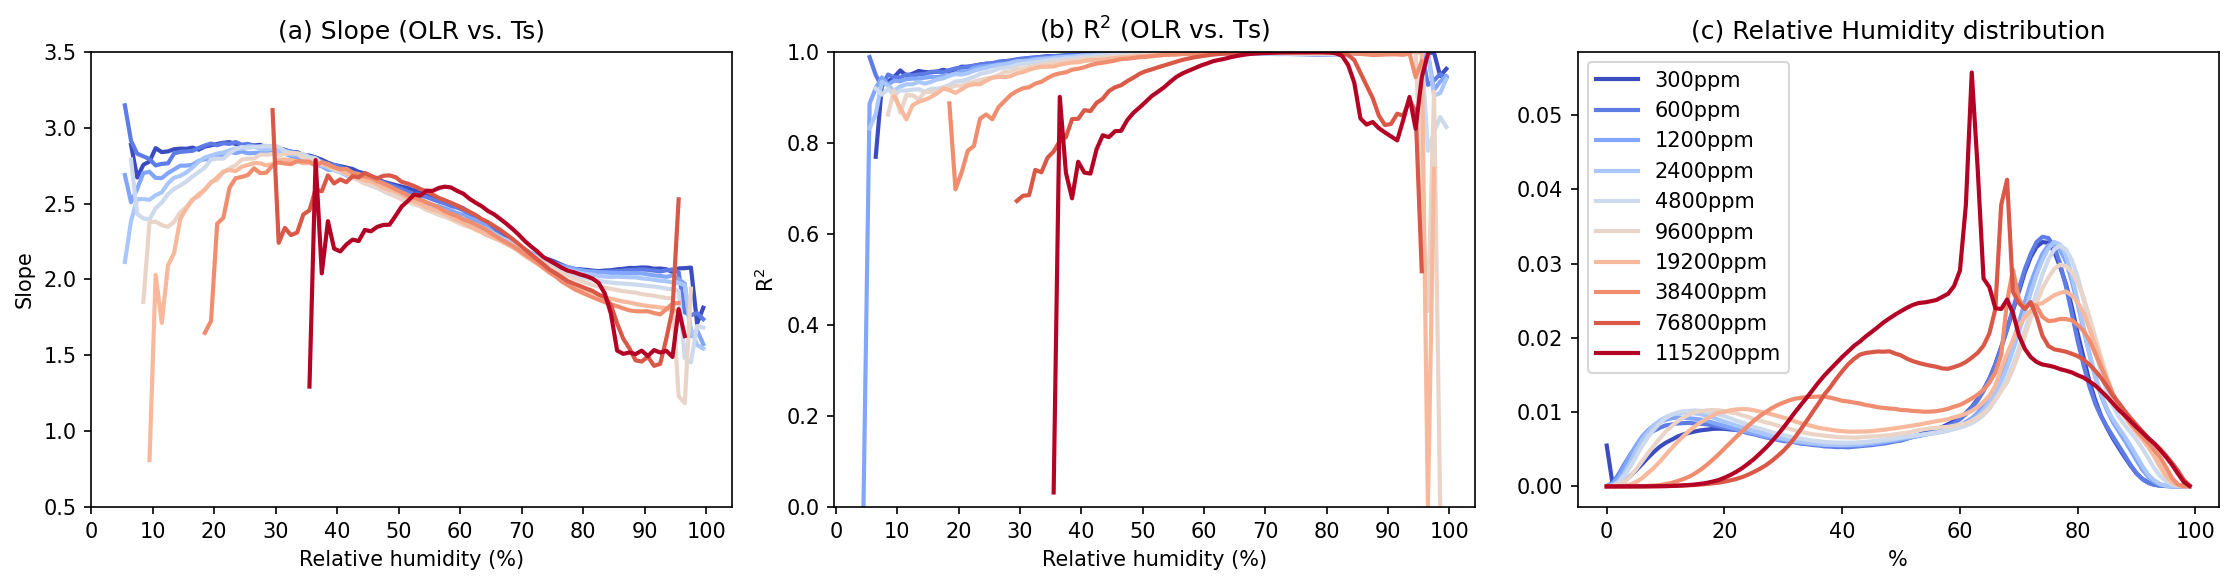

In [15]:
plt.figure(figsize=(15, 4),dpi=150)
plt.subplot(131)
for i in range(len(ctl_)):
    plt.plot(slope_arr[i][:],color=colors[i],label=label_[i],lw=2)
# plt.plot(np.nanmean(slope_arr,axis=0),color='k',lw=3,ls='--',label='mean')
plt.title('(a) Slope (OLR vs. Ts)')
plt.ylabel('Slope')
plt.xlabel('Relative humidity (%)')
plt.xticks(np.linspace(-0.5,99.5,11),[0,10,20,30,40,50,60,70,80,90,100])
plt.ylim([0.5,3.5])

plt.subplot(132)
for i in range(len(ctl_)):
    plt.plot(r2_arr[i][:],color=colors[i],label=label_[i],lw=2)
# plt.legend(fontsize=8,loc='best')
plt.title('(b) R$^2$ (OLR vs. Ts)')
plt.ylabel('R$^2$')
plt.xlabel('Relative humidity (%)')
plt.xticks(np.linspace(-0.5,99.5,11),[0,10,20,30,40,50,60,70,80,90,100])
plt.ylim([0,1])

plt.subplot(133)
for i in range(len(ctl_)):
    plt.plot(rh_dist[i],color=colors[i],label=label_[i],lw=2)
plt.legend(loc='upper left')
plt.title('(c) Relative Humidity distribution')
plt.xlabel('%')
plt.tight_layout()
plt.savefig('./figs/rh_fig2.pdf')
plt.show()

In [4]:
# spectral_slope_arr = np.zeros((len(ctl_),len(ctl_300.soc_bins_lw)))
# spectral_r2_arr = np.zeros((len(ctl_),len(ctl_300.soc_bins_lw)))
# spectral_forcing_arr = np.zeros((len(ctl_),len(ctl_300.soc_bins_lw))) # ADD BELOW!!!
# i=0
# for ctl in ctl_:
#     for j in range(len(ctl_300.soc_bins_lw)):
#         x = ctl.t_surf.values.ravel()
#         y = ctl.soc_spectral_olr.isel(soc_bins_lw=j).values.ravel()
#         mask = ~np.isnan(x) & ~np.isnan(y)
#         pf = st.linregress(x[mask], y[mask])
#         spectral_slope_arr[i][j]=pf[0]
#         spectral_forcing_arr[i][j]=pf[1]
#         spectral_r2_arr[i][j]=pf[2]**2
#     i+=1

In [5]:
# np.save('spectral_slope_arr.npy',spectral_slope_arr)
# np.save('spectral_r2_arr.npy',spectral_r2_arr)
# np.save('spectral_forcing_arr.npy',spectral_forcing_arr)
spectral_slope_arr = np.load('spectral_slope_arr.npy')
spectral_r2_arr = np.load('spectral_r2_arr.npy')
spectral_forcing_arr = np.load('spectral_forcing_arr.npy')

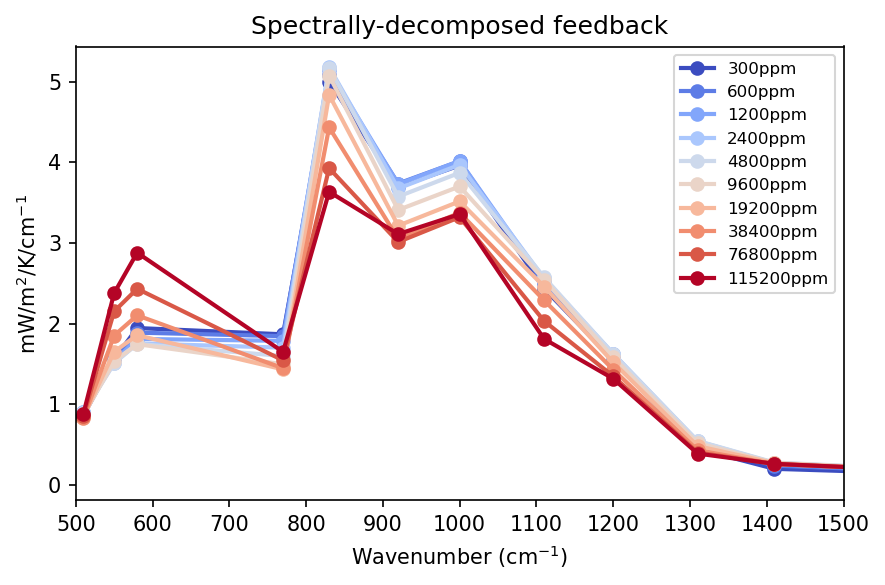

In [9]:
x=1/ctl_300.soc_bins_lw.values/100
x_interp = np.zeros(len(x)+1)
for i in range(1,len(x_interp)-1):
    x_interp[i]=(x[i]-x[i-1])/2+x[i-1]
x_interp[len(x)]=2*x_interp[len(x)-1]-x_interp[len(x)-2]
x_factor = np.diff(x_interp)
plt.figure(figsize=(6, 4),dpi=150)
for i in range(len(ctl_)):
    plt.plot(x,spectral_slope_arr[i][:]/x_factor*1e3,'o-',color=colors[i],label=label_[i],lw=2)
# plt.plot(np.nanmean(slope_arr,axis=0),color='k',lw=3,ls='--',label='mean')
plt.title('Spectrally-decomposed feedback')
plt.ylabel('mW/m$^2$/K/cm$^{-1}$')
plt.xlabel('Wavenumber (cm$^{-1}$)')
plt.legend(fontsize=8)
plt.xlim([500,1500])
plt.xticks(np.linspace(500,1500,11))
plt.tight_layout()
plt.savefig('./figs/spectral_fb.pdf')
plt.show()

### RH-dependent CS feedback where RH-dependence matters.

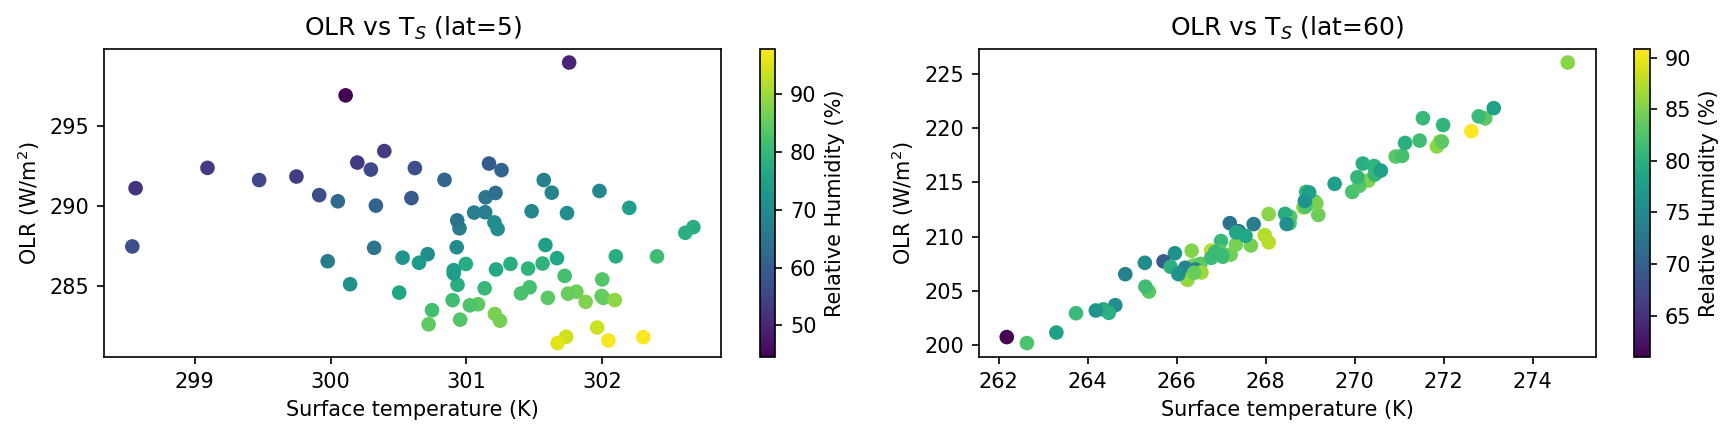

In [4]:
plt.figure(figsize=(12, 3),dpi=150)
plt.subplot(121)
plt.scatter(ctl_300.t_surf.isel(time=slice(20,100)).sel(lat=5,lon=0,method='nearest'), ctl_300.soc_olr.isel(time=slice(20,100)).sel(lat=5,lon=0,method='nearest'),c=ctl_300.rh.sel(pfull=slice(150,850)).mean('pfull').isel(time=slice(20,100)).sel(lat=5,lon=0,method='nearest'))
plt.colorbar(label='Relative Humidity (%)')
plt.xlabel('Surface temperature (K)')
plt.ylabel('OLR (W/m$^2$)')
plt.title('OLR vs T$_S$ (lat=5)')
plt.subplot(122)
plt.scatter(ctl_300.t_surf.isel(time=slice(20,100)).sel(lat=60,lon=0,method='nearest'), ctl_300.soc_olr.isel(time=slice(20,100)).sel(lat=60,lon=0,method='nearest'),c=ctl_300.rh.sel(pfull=slice(150,850)).mean('pfull').isel(time=slice(20,100)).sel(lat=60,lon=0,method='nearest'))
plt.colorbar(label='Relative Humidity (%)')
plt.xlabel('Surface temperature (K)')
plt.ylabel('OLR (W/m$^2$)')
plt.title('OLR vs T$_S$ (lat=60)')
plt.tight_layout()
plt.show()
# dpressure the same? How to calc RH (see Zhang)

As the surface temperature is getting warmer, the RH is increasing, reducing OLR. So plot dRH/dTs for these regions.

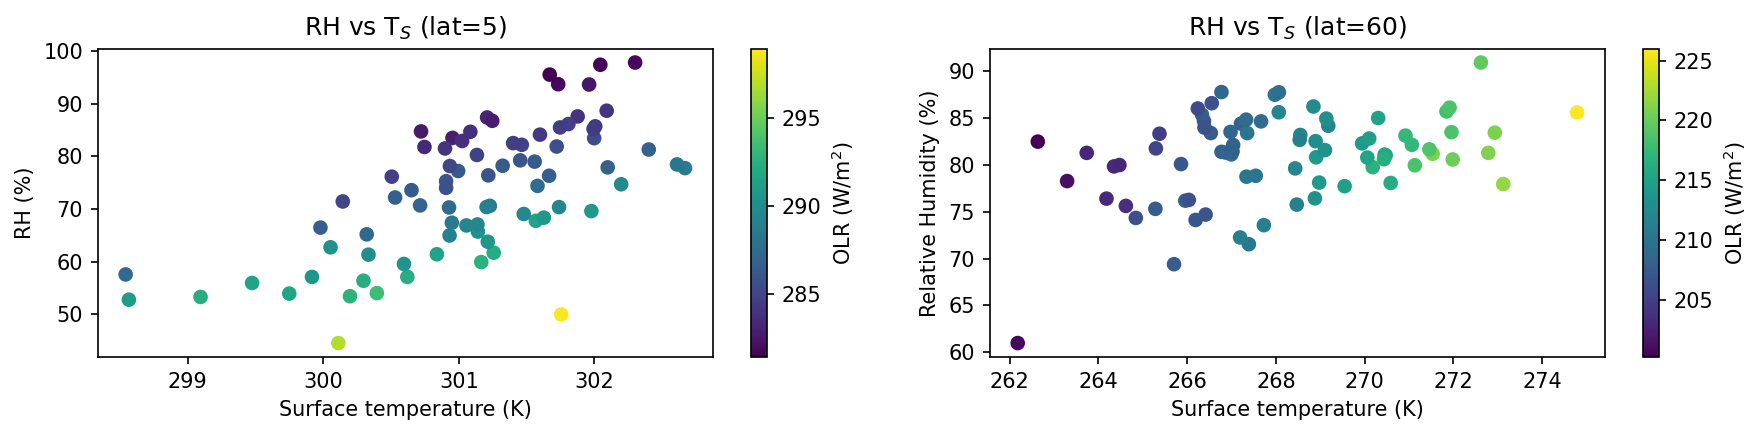

In [17]:
plt.figure(figsize=(12, 3),dpi=150)
plt.subplot(121)
plt.scatter(ctl_300.t_surf.isel(time=slice(20,100)).sel(lat=5,lon=0,method='nearest'), ctl_300.rh.sel(pfull=slice(150,850)).mean('pfull').isel(time=slice(20,100)).sel(lat=5,lon=0,method='nearest'),c=ctl_300.soc_olr.isel(time=slice(20,100)).sel(lat=5,lon=0,method='nearest'))
plt.colorbar(label='OLR (W/m$^2$)')
plt.xlabel('Surface temperature (K)')
plt.ylabel('RH (%)')
plt.title('RH vs T$_S$ (lat=5)')
plt.subplot(122)
plt.scatter(ctl_300.t_surf.isel(time=slice(20,100)).sel(lat=60,lon=0,method='nearest'), ctl_300.rh.sel(pfull=slice(150,850)).mean('pfull').isel(time=slice(20,100)).sel(lat=60,lon=0,method='nearest'),c=ctl_300.soc_olr.isel(time=slice(20,100)).sel(lat=60,lon=0,method='nearest'))
plt.colorbar(label='OLR (W/m$^2$)')
plt.xlabel('Surface temperature (K)')
plt.ylabel('Relative Humidity (%)')
plt.title('RH vs T$_S$ (lat=60)')
plt.tight_layout()
plt.show()
# dpressure the same? How to calc RH (see Zhang)

linear extrapolation error for lat=5 is ...

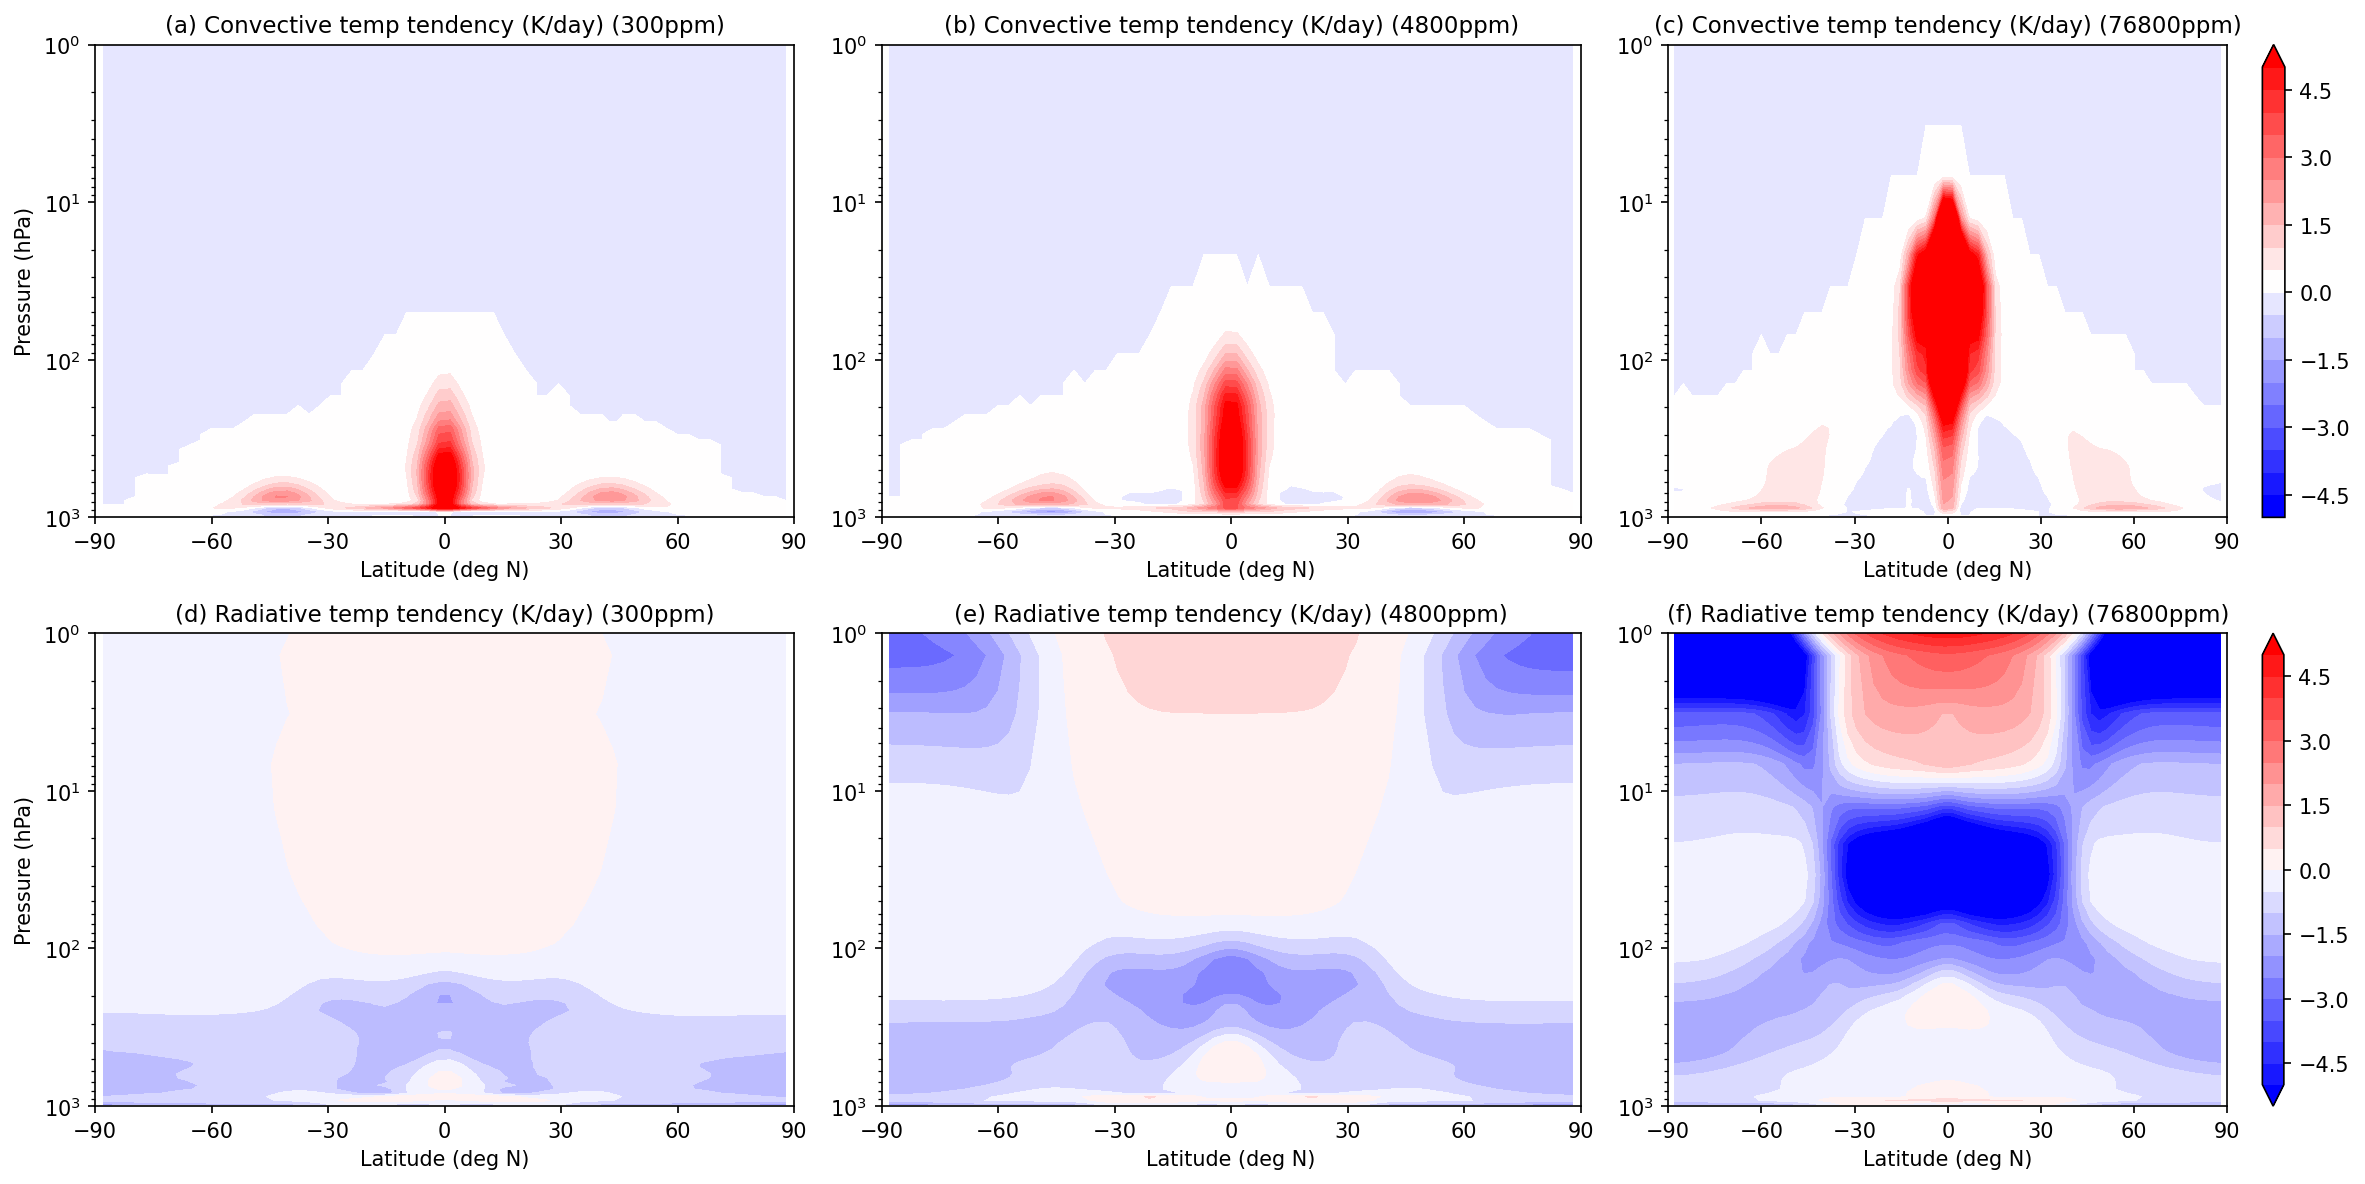

In [18]:
plt.figure(figsize=(16, 8),dpi=150)
plt.subplot(231)
(ctl_300.dt_tg_convection*24*3600).isel(time=slice(50,100)).mean(('time','lon')).plot.contourf(cmap='bwr',levels=21,vmin=-5,vmax=5,add_colorbar=False)
plt.ylim([1000,1])
plt.yscale('log')
plt.xlabel('Latitude (deg N)')
plt.xticks(np.linspace(-90,90,7))
plt.xlim([-90,90])
plt.ylabel('Pressure (hPa)')
plt.title('(a) Convective temp tendency (K/day) (300ppm)',fontsize=11)
plt.subplot(232)
(ctl_4800.dt_tg_convection*24*3600).isel(time=slice(50,100)).mean(('time','lon')).plot.contourf(cmap='bwr',levels=21,vmin=-5,vmax=5,add_colorbar=False)
plt.ylim([1000,1])
plt.yscale('log')
plt.xlabel('Latitude (deg N)')
plt.xticks(np.linspace(-90,90,7))
plt.xlim([-90,90])
plt.ylabel('')
plt.title('(b) Convective temp tendency (K/day) (4800ppm)',fontsize=11)
plt.subplot(233)
(ctl_76800.dt_tg_convection*24*3600).isel(time=slice(50,100)).mean(('time','lon')).plot.contourf(cmap='bwr',levels=21,vmin=-5,vmax=5,add_labels=False)
plt.ylim([1000,1])
plt.yscale('log')
plt.xlabel('Latitude (deg N)')
plt.xticks(np.linspace(-90,90,7))
plt.xlim([-90,90])
plt.ylabel('')
plt.title('(c) Convective temp tendency (K/day) (76800ppm)',fontsize=11)
plt.subplot(234)
(ctl_300.soc_tdt_rad*24*3600).isel(time=slice(50,100)).mean(('time','lon')).plot.contourf(cmap='bwr',levels=21,vmin=-5,vmax=5,add_colorbar=False)
plt.ylim([1000,1])
plt.yscale('log')
plt.xlabel('Latitude (deg N)')
plt.xticks(np.linspace(-90,90,7))
plt.xlim([-90,90])
plt.ylabel('Pressure (hPa)')
plt.title('(d) Radiative temp tendency (K/day) (300ppm)',fontsize=11)
plt.subplot(235)
(ctl_4800.soc_tdt_rad*24*3600).isel(time=slice(50,100)).mean(('time','lon')).plot.contourf(cmap='bwr',levels=21,vmin=-5,vmax=5,add_colorbar=False)
plt.ylim([1000,1])
plt.yscale('log')
plt.xlabel('Latitude (deg N)')
plt.xticks(np.linspace(-90,90,7))
plt.xlim([-90,90])
plt.ylabel('')
plt.title('(e) Radiative temp tendency (K/day) (4800ppm)',fontsize=11)
plt.subplot(236)
(ctl_76800.soc_tdt_rad*24*3600).isel(time=slice(50,100)).mean(('time','lon')).plot.contourf(cmap='bwr',levels=21,vmin=-5,vmax=5,add_labels=False)
plt.ylim([1000,1])
plt.yscale('log')
plt.xlabel('Latitude (deg N)')
plt.xticks(np.linspace(-90,90,7))
plt.xlim([-90,90])
plt.ylabel('')
plt.title('(f) Radiative temp tendency (K/day) (76800ppm)',fontsize=11)
plt.tight_layout()
plt.savefig('./figs/rad_conv.pdf')
plt.show()

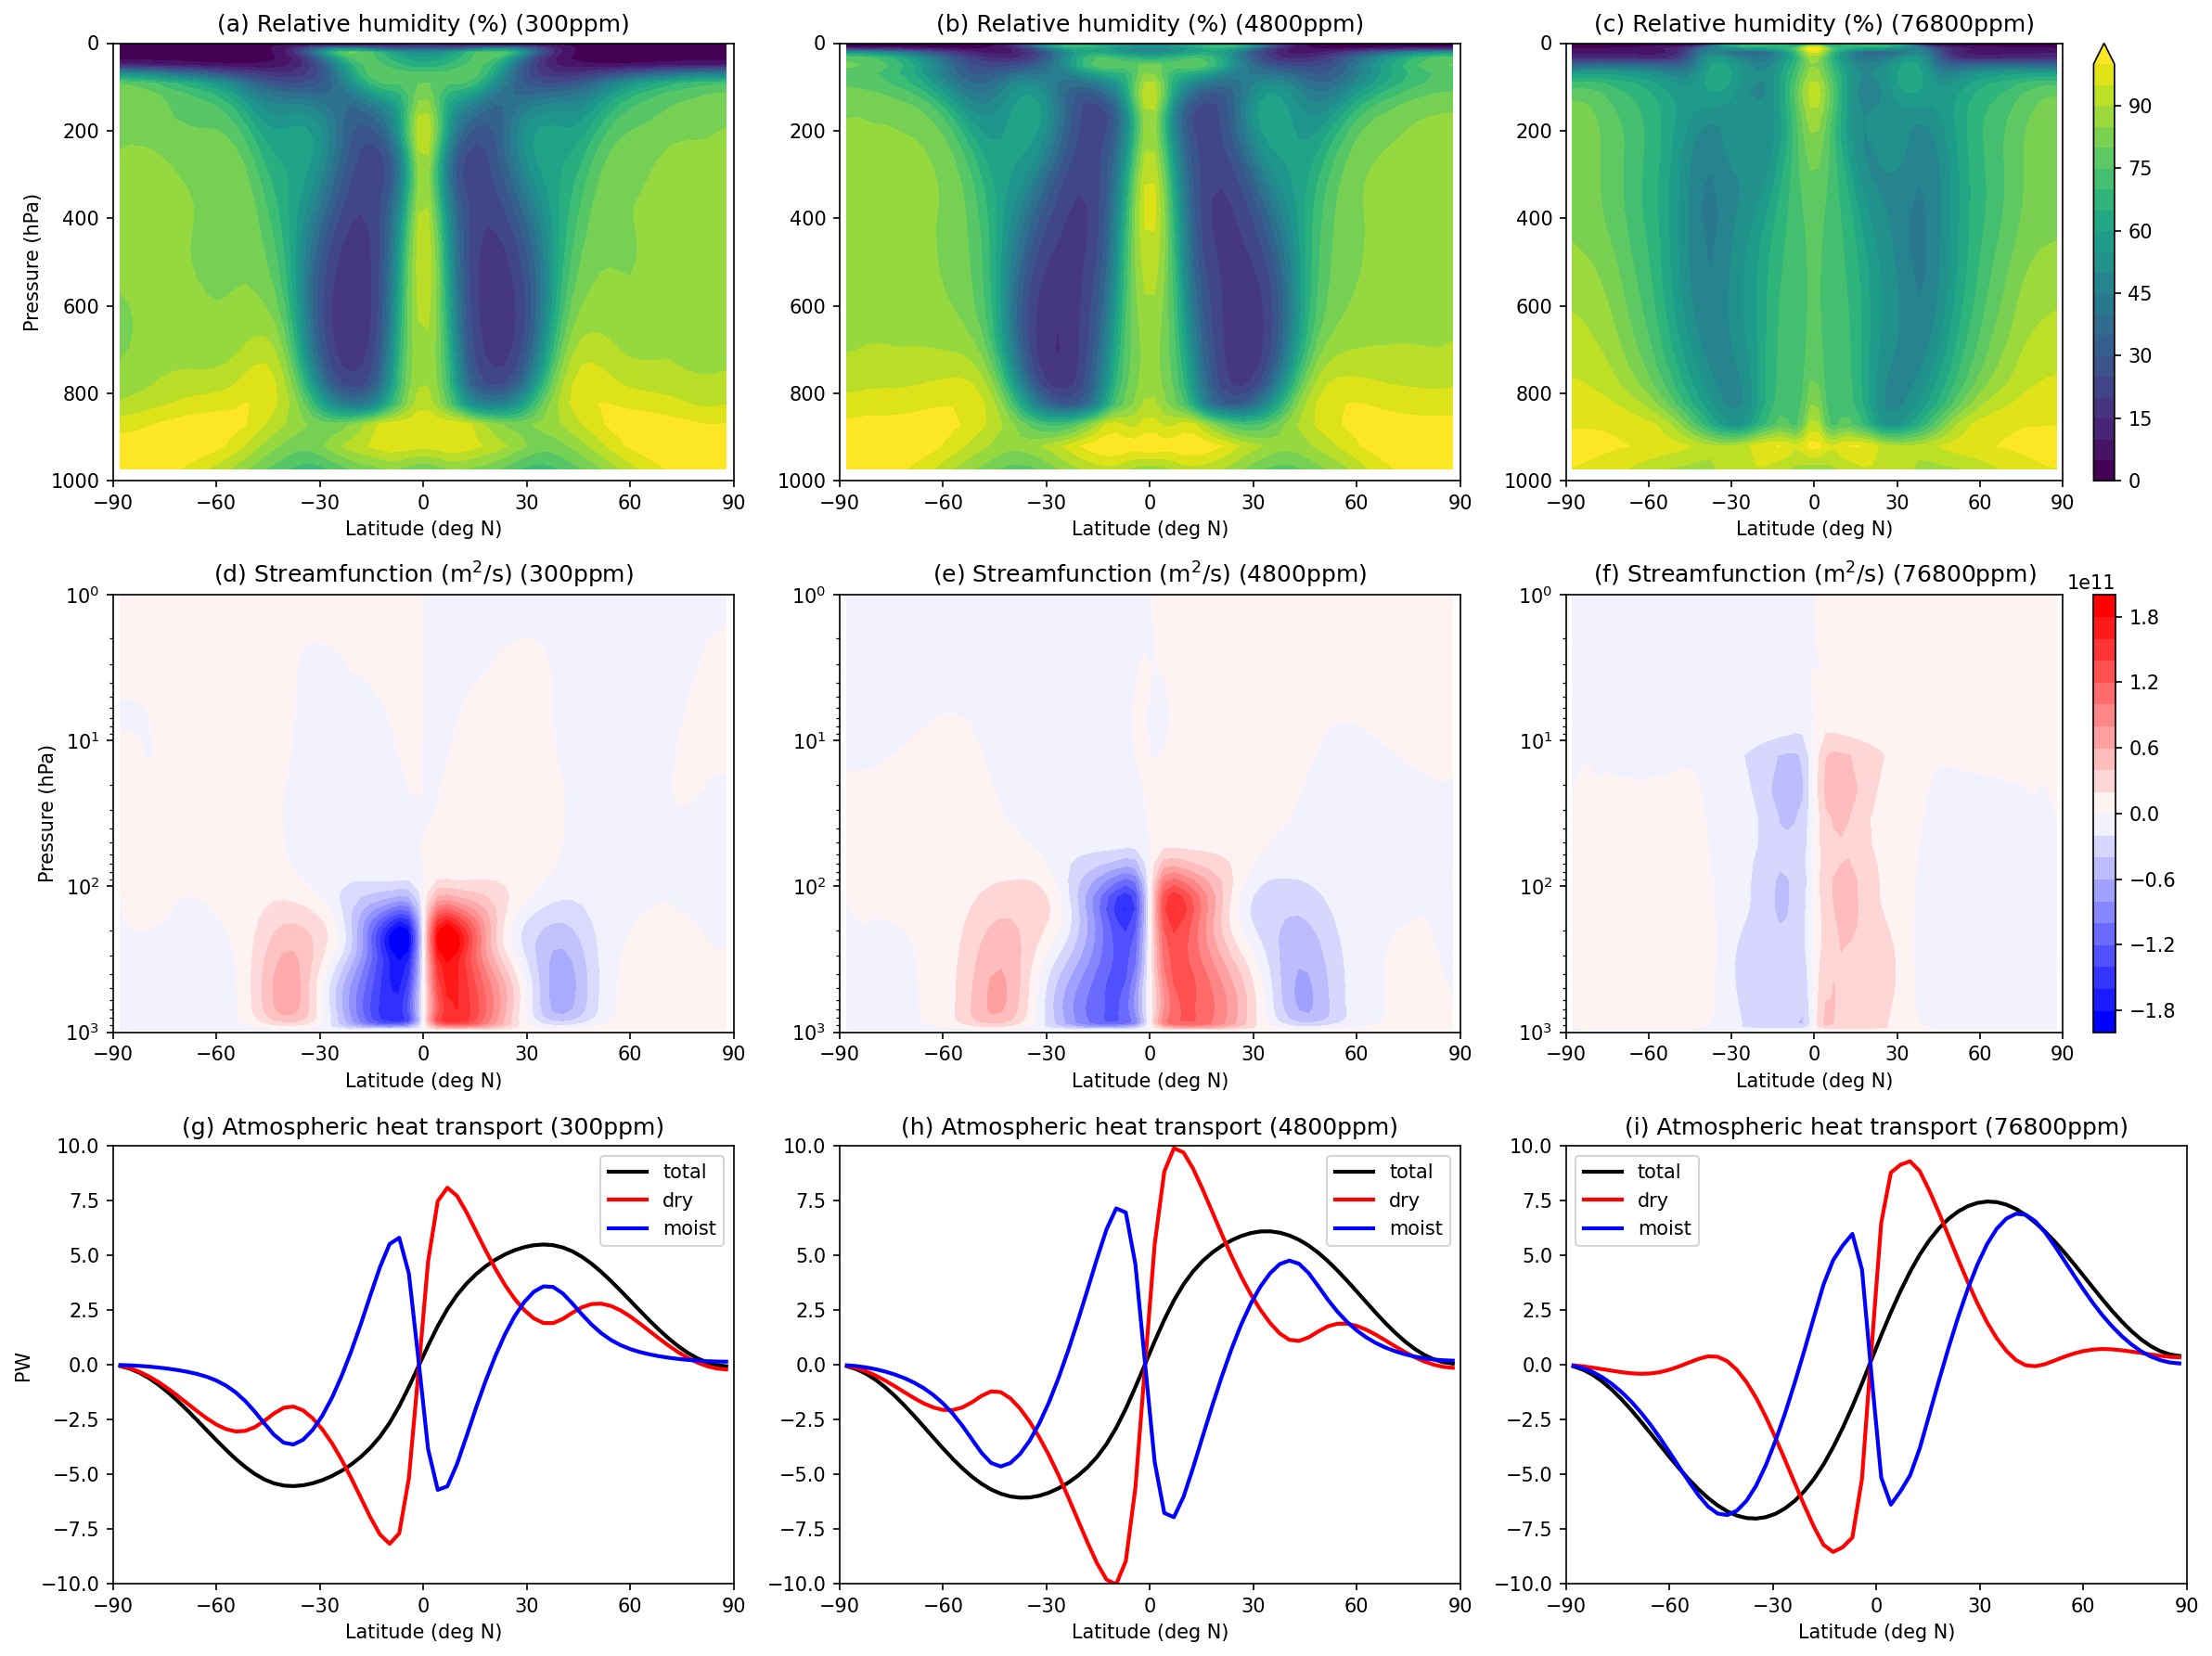

In [19]:
plt.figure(figsize=(16, 12),dpi=150)
plt.subplot(331)
ctl_300.rh.isel(time=slice(50,100)).mean(('time','lon')).plot.contourf(levels=21,vmin=0,vmax=100,add_colorbar=False)
plt.ylim([1000,0])
plt.title('(a) Relative humidity (%) (300ppm)')
plt.xlabel('Latitude (deg N)')
plt.xticks(np.linspace(-90,90,7))
plt.xlim([-90,90])
plt.ylabel('Pressure (hPa)')
plt.subplot(332)
ctl_4800.rh.isel(time=slice(50,100)).mean(('time','lon')).plot.contourf(levels=21,vmin=0,vmax=100,add_colorbar=False)
plt.ylim([1000,0])
plt.title('(b) Relative humidity (%) (4800ppm)')
plt.xlabel('Latitude (deg N)')
plt.xticks(np.linspace(-90,90,7))
plt.xlim([-90,90])
plt.ylabel('')
plt.subplot(333)
ctl_76800.rh.isel(time=slice(50,100)).mean(('time','lon')).plot.contourf(levels=21,vmin=0,vmax=100,add_labels=False)
plt.ylim([1000,0])
plt.title('(c) Relative humidity (%) (76800ppm)')
plt.xlabel('Latitude (deg N)')
plt.xticks(np.linspace(-90,90,7))
plt.xlim([-90,90])
plt.ylabel('')

ms_300 = mass_streamfunction(ctl_300)
ms_4800 = mass_streamfunction(ctl_4800)
ms_76800 = mass_streamfunction(ctl_76800)
plt.subplot(334)
(ms_300).isel(time=slice(50,100)).mean('time').plot.contourf(y='pfull',cmap='bwr',levels=21,vmin=-2e11,vmax=2e11,add_colorbar=False)
plt.ylim([1000,1])
plt.yscale('log')
plt.xlabel('Latitude (deg N)')
plt.xticks(np.linspace(-90,90,7))
plt.xlim([-90,90])
plt.ylabel('Pressure (hPa)')
# plt.axhline(y=100,c='k',lw=3)
plt.title('(d) Streamfunction (m$^2$/s) (300ppm)')
plt.subplot(335)
(ms_4800).isel(time=slice(50,100)).mean('time').plot.contourf(y='pfull',cmap='bwr',levels=21,vmin=-2e11,vmax=2e11,add_colorbar=False)
plt.ylim([1000,1])
plt.yscale('log')
plt.xlabel('Latitude (deg N)')
plt.xticks(np.linspace(-90,90,7))
plt.xlim([-90,90])
plt.ylabel('')
# plt.axhline(y=15,c='k',lw=3)
plt.title('(e) Streamfunction (m$^2$/s) (4800ppm)')
plt.subplot(336)
(ms_76800).isel(time=slice(50,100)).mean('time').plot.contourf(y='pfull',cmap='bwr',levels=21,vmin=-2e11,vmax=2e11,add_labels=False)
plt.ylim([1000,1])
plt.yscale('log')
plt.xlabel('Latitude (deg N)')
plt.xticks(np.linspace(-90,90,7))
plt.xlim([-90,90])
plt.ylabel('')
# plt.axhline(y=4,c='k',lw=3)
plt.title('(f) Streamfunction (m$^2$/s) (76800ppm)')

def mse_flux(data):
    grav = 9.80  # Gravitational acceleration
    a = 6376.0e3  # Earth radius
    L = 2.500e6  # Latent heat of vaporisation
    
    coslat = np.cos(np.pi * data.lat/180.)
    dlat = (data.lat[1]-data.lat[0]) * np.pi/180. * a
    lon_int_fac = 2. * np.pi * a * coslat
    dp=5000./grav
    
    # Evaluate time/zonal mean upward radiative fluxes at the surface
#     data['rflux_surf'] = data.t_surf ** 4. * 5.67e-8 - data.soc_surf_flux_sw - data.soc_surf_flux_lw
    data['rflux_surf'] = - data.soc_surf_flux_sw + data.soc_surf_flux_lw
    # Evaluate downward radiative fluxes at the TOA
    data['rflux_toa'] = -data.soc_toa_sw + data.soc_olr
    
    Fnet_atmos = (data.flux_lhe + data.flux_t + data.rflux_surf + data.rflux_toa) * lon_int_fac # flux into atmos is flux in at top and bottom
    total_heat_flux = -Fnet_atmos.cumsum('lat') * dlat /10.**15
    
    Fnet_L = (data.flux_lhe - data.precipitation * L) * lon_int_fac # flux of LH is water into atmos from evaporation - out from precip. On condensation, energy is converted to dry energy in atmosphere
    water_flux = Fnet_L.cumsum('lat') * dlat /10.**15
    
    dry_static_flux = total_heat_flux - water_flux
    return [total_heat_flux, water_flux, dry_static_flux]

[mse_300,moist_300,dry_300]=mse_flux(ctl_300.isel(time=slice(50,100)))
[mse_4800,moist_4800,dry_4800]=mse_flux(ctl_4800.isel(time=slice(50,100)))
[mse_76800,moist_76800,dry_76800]=mse_flux(ctl_76800.isel(time=slice(50,100)))

plt.subplot(337)
plt.plot(ctl_300.lat,mse_300.weighted(weights).mean(('time','lon')).values,lw=2,label='total', c='k')
plt.plot(ctl_300.lat,dry_300.weighted(weights).mean(('time','lon')).values,lw=2,label='dry', c='r')
plt.plot(ctl_300.lat,moist_300.weighted(weights).mean(('time','lon')).values,lw=2,label='moist', c='b')
plt.legend(loc='best')
plt.xlim([-90,90])
plt.ylim([-10,10])
plt.xticks(np.linspace(-90,90,7))
plt.xlabel('Latitude (deg N)')
plt.ylabel('PW')
plt.title('(g) Atmospheric heat transport (300ppm)')
plt.subplot(338)
plt.plot(ctl_300.lat,mse_4800.weighted(weights).mean(('time','lon')).values,lw=2,label='total', c='k')
plt.plot(ctl_300.lat,dry_4800.weighted(weights).mean(('time','lon')).values,lw=2,label='dry', c='r')
plt.plot(ctl_300.lat,moist_4800.weighted(weights).mean(('time','lon')).values,lw=2,label='moist', c='b')
plt.legend(loc='best')
plt.xlim([-90,90])
plt.ylim([-10,10])
plt.xticks(np.linspace(-90,90,7))
plt.xlabel('Latitude (deg N)')
plt.ylabel('')
plt.title('(h) Atmospheric heat transport (4800ppm)')
plt.subplot(339)
plt.plot(ctl_300.lat,mse_76800.weighted(weights).mean(('time','lon')).values,lw=2,label='total', c='k')
plt.plot(ctl_300.lat,dry_76800.weighted(weights).mean(('time','lon')).values,lw=2,label='dry', c='r')
plt.plot(ctl_300.lat,moist_76800.weighted(weights).mean(('time','lon')).values,lw=2,label='moist', c='b')
plt.legend(loc='best')
plt.xlim([-90,90])
plt.ylim([-10,10])
plt.xticks(np.linspace(-90,90,7))
plt.xlabel('Latitude (deg N)')
plt.ylabel('')
plt.title('(i) Atmospheric heat transport (76800ppm)')
plt.tight_layout()
plt.savefig('./figs/stream_trans_RH.pdf')
plt.show()

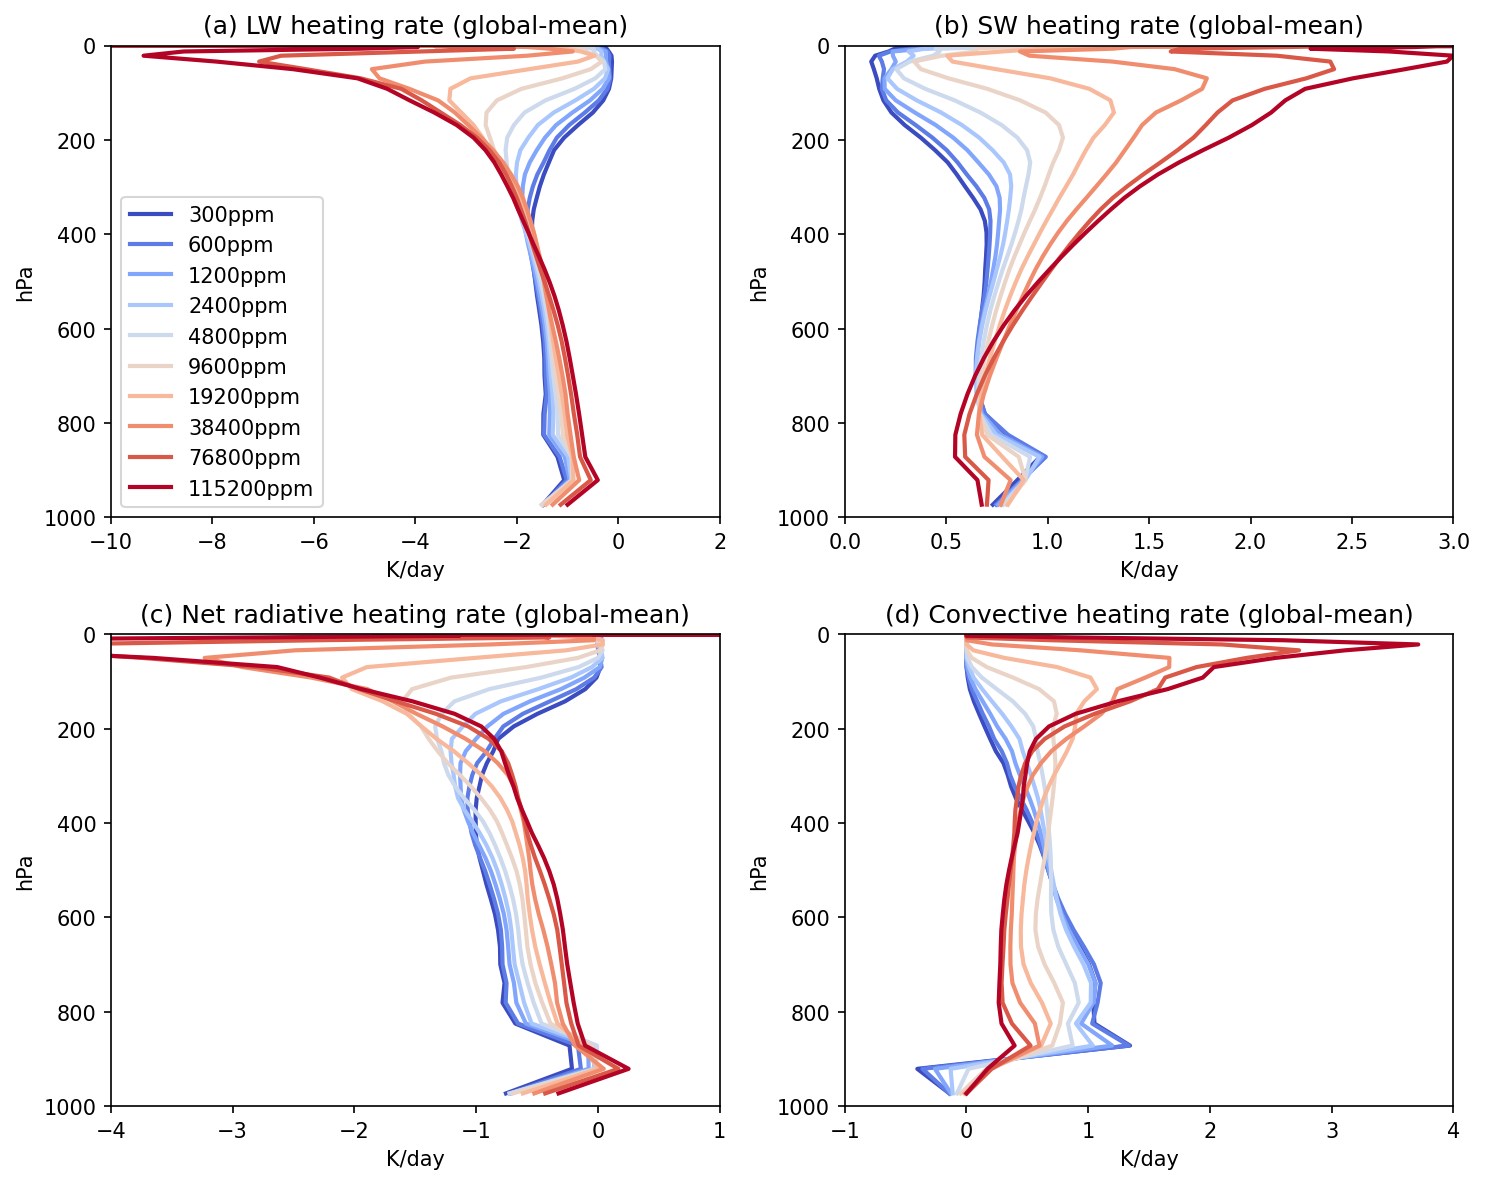

In [20]:
plt.figure(figsize=(10, 8),dpi=150)
plt.subplot(221)
i=0
for (ctl,ilabel) in zip(ctl_,label_):
    (ctl.soc_tdt_lw*3600*24).isel(time=slice(50,100)).weighted(weights).mean(('time','lat','lon')).plot(y='pfull',lw=2,c=colors[i],label=ilabel)
    i+=1
plt.ylim([1000,0])
plt.xlim([-10,2])
plt.xlabel('K/day')
plt.ylabel('hPa')
plt.title('(a) LW heating rate (global-mean)')
plt.legend(loc='best')

plt.subplot(222)
i=0
for (ctl,ilabel) in zip(ctl_,label_):
    (ctl.soc_tdt_sw*3600*24).isel(time=slice(50,100)).weighted(weights).mean(('time','lat','lon')).plot(y='pfull',lw=2,c=colors[i],label=ilabel)
    i+=1
plt.ylim([1000,0])
plt.xlim([0,3])
plt.xlabel('K/day')
plt.ylabel('hPa')
plt.title('(b) SW heating rate (global-mean)')

plt.subplot(223)
i=0
for (ctl,ilabel) in zip(ctl_,label_):
    (ctl.soc_tdt_rad*3600*24).isel(time=slice(50,100)).weighted(weights).mean(('time','lat','lon')).plot(y='pfull',lw=2,c=colors[i],label=ilabel)
    i+=1
plt.ylim([1000,0])
plt.xlim([-4,1])
plt.xlabel('K/day')
plt.ylabel('hPa')
plt.title('(c) Net radiative heating rate (global-mean)')

plt.subplot(224)
i=0
for (ctl,ilabel) in zip(ctl_,label_):
    (ctl.dt_tg_convection*3600*24).isel(time=slice(50,100)).weighted(weights).mean(('time','lat','lon')).plot(y='pfull',lw=2,c=colors[i],label=ilabel)
    i+=1
plt.ylim([1000,0])
plt.xlim([-1,4])
plt.xlabel('K/day')
plt.ylabel('hPa')
plt.title('(d) Convective heating rate (global-mean)')
plt.tight_layout()
plt.savefig('./figs/heating_rates.pdf')
plt.show()